#**📊 RUL Prediction for Instrument Air Compressor**
The system selected for this project is the plant’s instrument air supply system, consisting of two identical multistage centrifugal compressors arranged in a 1-operating / 1-standby configuration. These compressors suction raw atmospheric air and supply compressed air to all plant instruments. Because instrument air is fundamental to safe and stable plant operation, any interruption in air supply can cause widespread disturbances and force process units into partial or full shutdown. Despite the standby redundancy, the plant occasionally experience’s
reliability issues such as unexpected trips of the duty compressor, automatic changeovers to the standby unit.

### **📄  Dataset Description:**
The dataset was collected to support the development of remaining
useful life (RUL) prediction models for <u>**One Selected Instrument Air Compressors**</u> using machine learning methods. It consists of multivariate time series data obtained from several analogue and digital sensors installed on the compressor.

In [105]:
# 📥 Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

---
##📥 **Loading & Reading the dataset from UR**

In [106]:
url = 'https://raw.githubusercontent.com/Fahad-Alzahrani/ISE-518-project-Plant-Air-compressor-RUL-analysis-/refs/heads/main/comp_data.csv'
df = pd.read_csv(url, delimiter=',')

# Display the 1st 10 rows of the dataset
display(df.head(5))

print("\n") # Added spacing here

# Data types and non-null counts
df.info()

print("\n") # Added spacing here

# Summary statistics
display(df.describe())

day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
0          1                0                  27.75              51.4   
1          2                0                  24.51              55.4   
2          3                0                  29.84              62.0   
3          4                0                  21.91              51.2   
4          5                0                  29.15              60.3   

   vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
0               2.017                    89.95                   7.953   
1               2.055                    86.50                   7.943   
2               2.023                    90.04                   8.036   
3               2.082                    88.25                   8.113   
4               2.028                    88.71                   7.991   

   suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
0                 1.006            100.28                     3.512   
1                 1.016             98.85                     3.517   
2                 1.006            101.29                     3.513   
3                 1.010             99.68                     3.473   
4                 1.006             99.97                     3.504   

   bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
0                      59.39                 54.61           0.05   
1                      60.86                 55.18           0.05   
2                      60.79                 54.84           0.05   
3                      60.80                 53.50           0.05   
4                      59.94                 54.43           0.05   

   high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
0              0        0     358.0                       1   
1              0        0     357.0                       0   
2              0        0     356.0                       0   
3              0        0     355.0                       0   
4              0        0     354.0                       0   

   days_since_oil_change health_state  
0                      0       normal  
1                      1       normal  
2                      2       normal  
3                      3       normal  
4                      4       normal



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day_index                  2516 non-null   int64  
 1   sand_storm_flag            2516 non-null   int64  
 2   ambient_temperature_c      2516 non-null   float64
 3   humidity_percent           2516 non-null   float64
 4   vibration_rms_mm_s         2516 non-null   float64
 5   discharge_temperature_c    2516 non-null   float64
 6   discharge_pressure_bar     2516 non-null   float64
 7   suction_pressure_bar       2516 non-null   float64
 8   flow_rate_m3_min           2516 non-null   float64
 9   bearing_oil_pressure_bar   2516 non-null   float64
 10  bearing_oil_temperature_c  2516 non-null   float64
 11  casing_temperature_c       2516 non-null   float64
 12  dp_filter_bar              2516 non-null   float64
 13  high_dp_alarm              2516 non-null   int

day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
count  2516.000000      2516.000000            2516.000000       2516.000000   
mean   1276.472178         0.025040              29.461169         56.042011   
std     736.886928         0.156277               8.731391         13.343222   
min       1.000000         0.000000               8.240000         30.100000   
25%     636.750000         0.000000              21.857500         46.300000   
50%    1278.500000         0.000000              30.240000         53.700000   
75%    1910.250000         0.000000              37.010000         63.900000   
max    2555.000000         1.000000              49.790000         95.000000   

       vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
count         2516.000000              2516.000000             2516.000000   
mean             2.021019                89.935130                7.999241   
std              0.120836                 4.781981                0.052613   
min              1.812000                78.960000                7.734029   
25%              1.970000                86.110000                7.966000   
50%              2.005000                90.140000                7.999500   
75%              2.040000                93.692500                8.034000   
max              3.328215               145.290000                8.195000   

       suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
count           2516.000000       2516.000000               2516.000000   
mean               0.998997         99.748070                  3.313383   
std                0.014253          2.218724                  0.126389   
min                0.700000         52.430000                  1.825000   
25%                0.992000         99.180000                  3.223750   
50%                1.000000         99.930000                  3.318000   
75%                1.007000        100.620000                  3.408000   
max                1.034000        103.940000                  3.570000   

       bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
count                2516.000000           2516.000000    2516.000000   
mean                   62.815900             55.034554       0.067314   
std                     1.947679              0.709700       0.035665   
min                    58.500000             52.850000       0.050000   
25%                    61.370000             54.580000       0.050000   
50%                    62.760000             54.990000       0.050000   
75%                    64.140000             55.412500       0.050000   
max                    86.740000             60.520000       0.228863   

       high_dp_alarm      failure     TTF_days  maintenance_oil_change  \
count    2516.000000  2516.000000  2399.000000             2516.000000   
mean        0.057631     0.004372   203.230513                0.005167   
std         0.233091     0.065990   175.908031                0.071710   
min         0.000000     0.000000     0.000000                0.000000   
25%         0.000000     0.000000    63.000000                0.000000   
50%         0.000000     0.000000   156.000000                0.000000   
75%         0.000000     0.000000   297.000000                0.000000   
max         1.000000     1.000000   715.000000                1.000000   

       days_since_oil_change  
count            2516.000000  
mean               88.659777  
std                52.302974  
min                 0.000000  
25%                43.000000  
50%                88.000000  
75%               134.000000  
max               179.000000

---
## 📈 **Missing data and duplication Check**
In this step, we will examin the dataset for any missing or duplicated data.

In [107]:
# Check missing data
print("\n\nMissing values:") # Added spacing here
print(df.isnull().sum())

# Check duplicates
print("\n\nDuplicate rows:") # Added spacing here
print(df.duplicated().sum())



Missing values:
day_index                      0
sand_storm_flag                0
ambient_temperature_c          0
humidity_percent               0
vibration_rms_mm_s             0
discharge_temperature_c        0
discharge_pressure_bar         0
suction_pressure_bar           0
flow_rate_m3_min               0
bearing_oil_pressure_bar       0
bearing_oil_temperature_c      0
casing_temperature_c           0
dp_filter_bar                  0
high_dp_alarm                  0
failure                        0
TTF_days                     117
maintenance_oil_change         0
days_since_oil_change          0
health_state                   0
dtype: int64


Duplicate rows:
0


---
##**Checking for Outliers in the dataset**
Here, we will apply Z-score method (with threshold = 3) to detect the outliers in the numerical dataset

In [108]:
from scipy.stats import zscore

# Select only the numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define a threshold for outlier detection (e.g., Z-score > 3 or < -3)
threshold = 3

print("Outliers detected using Z-score per column:")

for col in numerical_cols:
    # Calculate Z-scores for the current column
    z_scores = zscore(df[col])

    # Find outliers in the current column
    outliers_col = df[(z_scores > threshold) | (z_scores < -threshold)]

    if not outliers_col.empty:
        print(f"\nOutliers in '{col}': {len(outliers_col)} detected")
        display(outliers_col)
    else:
        print(f"\nNo outliers found in '{col}' based on the Z-score threshold of {threshold}.")

Outliers detected using Z-score per column:

No outliers found in 'day_index' based on the Z-score threshold of 3.

Outliers in 'sand_storm_flag': 63 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
180         181                1                  31.05              35.7   
185         186                1                  34.66              49.8   
191         192                1                  32.89              55.0   
210         211                1                  35.22              46.1   
212         213                1                  39.11              45.1   
...         ...              ...                    ...               ...   
2357       2395                1                  29.72              40.1   
2370       2408                1                  37.33              51.8   
2379       2417                1                  37.14              40.8   
2382       2420                1                  35.81              51.5   
2387       2425                1                  32.34              55.3   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
180                2.050                    93.94                   7.974   
185                2.036                    93.13                   7.975   
191                2.128                    92.48                   7.944   
210                2.061                    94.49                   7.979   
212                2.096                    97.03                   7.952   
...                  ...                      ...                     ...   
2357               1.998                    93.81                   8.021   
2370               2.066                    96.38                   7.961   
2379               2.143                    96.60                   8.020   
2382               2.094                    95.18                   7.905   
2387               2.115                    93.65                   8.030   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
180                  0.974             96.94                     3.461   
185                  1.000             98.08                     3.510   
191                  0.992             98.20                     3.437   
210                  0.990             98.31                     3.395   
212                  0.994             98.11                     3.447   
...                    ...               ...                       ...   
2357                 0.997             96.68                     3.348   
2370                 0.977             98.22                     3.343   
2379                 0.991             97.13                     3.409   
2382                 0.980             99.27                     3.337   
2387                 0.989             97.28                     3.285   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
180                       61.42                 54.67          0.089   
185                       60.63                 54.59          0.071   
191                       58.92                 55.48          0.089   
210                       61.90                 54.46          0.071   
212                       61.73                 54.14          0.088   
...                         ...                   ...            ...   
2357                      62.33                 55.61          0.084   
2370                      63.33                 55.27          0.080   
2379                      63.33                 55.05          0.086   
2382                      64.13                 55.08          0.073   
2387                      61.87                 54.58          0.082   

      high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
180               0        0     178.0                       1   
185               0        0     173.0                       0   
191               0        0     167.0                       0   
210               0        0     148.0                       0   
212               0        0     146.0                       0   
...   


No outliers found in 'ambient_temperature_c' based on the Z-score threshold of 3.

No outliers found in 'humidity_percent' based on the Z-score threshold of 3.

Outliers in 'vibration_rms_mm_s': 58 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
164         165                0                  27.97              49.7   
354         355                0                  32.28              56.8   
355         356                0                  32.02              58.1   
356         357                0                  32.56              54.8   
406         409                0                  19.32              61.1   
409         412                0                  17.90              67.7   
415         418                0                  22.87              59.0   
416         419                0                  22.94              63.8   
417         420                0                  25.48              49.0   
418         421                0                  17.43              45.9   
419         422                0                  18.93              45.4   
420         423                0                  14.68              50.8   
421         424                0                  18.59              55.7   
422         425                0                  14.84              49.7   
423         426                0                  16.14              51.3   
424         427                0                  19.92              50.5   
425         428                0                  15.53              58.6   
426         429                0                  16.48              47.0   
427         430                0                  19.66              59.5   
428         431                0                  16.85              62.4   
429         432                0                  15.84              63.5   
430         433                0                  20.79              57.1   
431         434                0                  18.90              64.5   
432         435                0                  22.19              48.1   
602         610                0                  40.68              77.3   
708         716                0                  31.32              51.7   
709         717                0                  28.98              56.4   
710         718                0                  31.73              45.2   
711         719                0                  24.13              47.0   
792         806                0                  22.14              64.0   
793         807                0                  20.64              56.5   
794         808                0                  21.08              51.0   
795         809                0                  16.24              58.2   
963         984                0                  43.09              55.0   
1453       1474                0                  18.95              60.0   
1509       1530                0                  12.84              45.0   
1510       1531                0                  15.30              45.2   
1511       1532                0                  16.37              49.0   
1536       1558                0                  17.97              43.9   
1537       1559                0                  19.33              47.1   
1538       1560                0                  17.49              40.7   
1539       1561                0                  21.41              46.0   
1540       1563                0                  19.93              55.5   
1541       1564                0                  16.45              53.5   
1542       1565                0                  17.49              48.5   
1543       1566                0                  15.63              58.1   
1637       1661                0                  29.56              51.5   
1959       1983                0                  25.35              31.6   
1960       1984                0                  28.83              31.0   
2166       2191                0                  25.50              46.4   
2168       2193                0                  23.62              42.3   
21


Outliers in 'discharge_temperature_c': 4 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
311         312                0                  33.28              55.9   
408         411                0                  17.26              62.9   
1204       1225                0                  22.16              36.5   
1506       1527                0                  17.48              62.4   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
311                1.999                   145.29                   7.989   
408                2.295                   115.40                   8.015   
1204               2.028                   134.45                   7.971   
1506               2.067                   116.38                   7.993   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
311                  1.001             99.63                     3.256   
408                  0.983             98.11                     3.230   
1204                 0.988            100.61                     3.185   
1506                 1.007            101.27                     3.311   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
311                       64.41                 54.11          0.050   
408                       65.01                 56.44          0.139   
1204                      65.57                 55.72          0.050   
1506                      61.59                 55.51          0.120   

      high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
311               0        0      47.0                       0   
408               0        0      24.0                       0   
1204              0        0     307.0                       0   
1506              0        0       5.0                       0   

      days_since_oil_change   health_state  
311                     131  early_warning  
408                      50       critical  
1204                    144         normal  
1506                     86       critical


Outliers in 'discharge_pressure_bar': 12 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
356         357                0                  32.56              54.8   
709         717                0                  28.98              56.4   
710         718                0                  31.73              45.2   
1510       1531                0                  15.30              45.2   
1537       1559                0                  19.33              47.1   
1542       1565                0                  17.49              48.5   
1959       1983                0                  25.35              31.6   
2000       2025                1                  33.24              50.6   
2167       2192                0                  30.76              62.5   
2169       2194                0                  24.21              64.8   
2307       2345                0                  30.21              38.8   
2396       2434                0                  39.37              58.1   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
356             2.662964                91.832054                7.753504   
709             2.385614                90.458832                7.798925   
710             2.641506                91.361334                7.816074   
1510            2.439394                86.446131                7.776750   
1537            2.805668                88.382566                7.770999   
1542            2.583715                86.657231                7.765599   
1959            2.413789                90.985498                7.773112   
2000            2.006000                94.110000                8.195000   
2167            2.346667                93.889490                7.734029   
2169            2.636461                91.322256                7.817135   
2307            2.049000                89.590000                8.158000   
2396            2.461825                97.389035                7.788109   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
356                  0.981         96.390844                  3.139255   
709                  0.987         98.653290                  3.113318   
710                  0.989         98.834089                  3.016954   
1510                 0.998         97.540625                  3.215939   
1537                 1.003         98.255006                  3.178809   
1542                 1.015         97.564181                  3.071187   
1959                 0.987         96.942608                  3.480572   
2000                 0.971         97.040000                  3.394000   
2167                 1.007         98.497253                  3.390971   
2169                 1.001         96.854153                  3.278905   
2307                 1.008         98.810000                  3.461000   
2396                 1.001         96.592136                  3.200295   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
356                   68.347626             55.941621       0.150785   
709                   68.467635             58.577360       0.187583   
710                   68.800392             57.434932       0.200275   
1510                  65.089234             57.000567       0.193123   
1537                  66.136402             56.688225       0.134445   
1542                  65.196824             55.603921       0.172798   
1959                  60.612186             57.126633       0.124390   
2000                  60.650000             53.580000       0.080000   
2167                  63.100909             56.337138       0.087529   
2169                  62.196774             57.824222       0.124650   
2307                  60.640000             54.820000       0.050000   
2396                  64.524518             57.182238       0.126844   

      high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
356               1        0       2


Outliers in 'suction_pressure_bar': 7 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
326         327                0                  33.20              69.8   
432         435                0                  22.19              48.1   
795         809                0                  16.24              58.2   
1511       1532                0                  16.37              49.0   
1543       1566                0                  15.63              58.1   
1801       1825                0                  21.18              53.5   
2388       2426                0                  42.56              49.4   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
326                2.022                    91.72                   7.920   
432                3.314                    96.64                   8.012   
795                3.155                    94.49                   7.975   
1511               3.152                    92.55                   8.014   
1543               3.017                    92.97                   8.023   
1801               2.055                    84.35                   8.035   
2388               1.960                    97.13                   8.032   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
326                  0.700             99.10                     3.208   
432                  0.936             69.25                     2.640   
795                  0.937             71.55                     2.588   
1511                 0.943             70.76                     2.621   
1543                 0.947             69.76                     2.590   
1801                 0.795            101.40                     3.511   
2388                 0.700             99.03                     3.339   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
326                       63.02                 55.49           0.12   
432                       69.08                 59.78           0.17   
795                       68.25                 60.52           0.05   
1511                      68.52                 59.74           0.05   
1543                      68.96                 59.49           0.05   
1801                      60.61                 54.64           0.05   
2388                      62.15                 54.03           0.05   

      high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
326               0        0      32.0                       0   
432               1        1       0.0                       0   
795               0        1       0.0                       0   
1511              0        1       0.0                       0   
1543              0        1       0.0                       0   
1801              0        0     160.0                       0   
2388              0        0      10.0                       0   

      days_since_oil_change   health_state  
326                     146  early_warning  
432                      74        failure  
795                      88        failure  
1511                     91        failure  
1543                    125        failure  
1801                     24         normal  
2388                     85       critical


Outliers in 'flow_rate_m3_min': 10 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
58           59                0                  19.63              51.0   
430         433                0                  20.79              57.1   
431         434                0                  18.90              64.5   
432         435                0                  22.19              48.1   
711         719                0                  24.13              47.0   
795         809                0                  16.24              58.2   
1162       1183                0                  13.94              64.8   
1511       1532                0                  16.37              49.0   
1539       1561                0                  21.41              46.0   
1543       1566                0                  15.63              58.1   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
58              1.975000                82.980000                7.942000   
430             3.165935                93.562070                7.888890   
431             3.328215                92.660748                8.018157   
432             3.314000                96.640000                8.012000   
711             3.199000                99.320000                7.985000   
795             3.155000                94.490000                7.975000   
1162            1.959000                81.930000                8.022000   
1511            3.152000                92.550000                8.014000   
1539            3.052000                96.220000                8.026000   
1543            3.017000                92.970000                8.023000   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
58                   1.001         64.850000                  3.425000   
430                  0.982         91.957930                  2.894426   
431                  1.002         91.793425                  2.946193   
432                  0.936         69.250000                  2.640000   
711                  0.961         70.380000                  2.422000   
795                  0.937         71.550000                  2.588000   
1162                 0.999         52.430000                  3.241000   
1511                 0.943         70.760000                  2.621000   
1539                 0.963         69.600000                  2.561000   
1543                 0.947         69.760000                  2.590000   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
58                    61.910000             55.530000       0.050000   
430                   67.649809             58.624262       0.175157   
431                   69.931283             56.413478       0.164182   
432                   69.080000             59.780000       0.170000   
711                   72.380000             60.280000       0.050000   
795                   68.250000             60.520000       0.050000   
1162                  62.340000             55.490000       0.050000   
1511                  68.520000             59.740000       0.050000   
1539                  70.300000             59.630000       0.050000   
1543                  68.960000             59.490000       0.050000   

      high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
58                0        0     300.0                       0   
430               1        0       2.0                       0   
431               0        0       1.0                       0   
432               1        1       0.0                       0   
711               0        1       0.0                       0   
795               0        1       0.0                       0   
1162              0        0     349.0                       0   
1511              0        1       0.0                       0   
1539              0        1       0.0                       0   
1543              0        1       0.0    


Outliers in 'bearing_oil_pressure_bar': 11 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
430         433                0                  20.79              57.1   
432         435                0                  22.19              48.1   
584         592                0                  38.78              56.0   
711         719                0                  24.13              47.0   
795         809                0                  16.24              58.2   
1511       1532                0                  16.37              49.0   
1539       1561                0                  21.41              46.0   
1543       1566                0                  15.63              58.1   
1614       1638                0                  33.35              31.1   
1836       1860                0                  19.35              51.8   
1937       1961                0                  23.21              49.1   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
430             3.165935                 93.56207                 7.88889   
432             3.314000                 96.64000                 8.01200   
584             1.972000                 94.71000                 8.05100   
711             3.199000                 99.32000                 7.98500   
795             3.155000                 94.49000                 7.97500   
1511            3.152000                 92.55000                 8.01400   
1539            3.052000                 96.22000                 8.02600   
1543            3.017000                 92.97000                 8.02300   
1614            2.045000                 91.73000                 7.89100   
1836            2.014000                 83.05000                 7.98400   
1937            2.013000                 85.73000                 7.96500   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
430                  0.982          91.95793                  2.894426   
432                  0.936          69.25000                  2.640000   
584                  0.997         100.12000                  2.174000   
711                  0.961          70.38000                  2.422000   
795                  0.937          71.55000                  2.588000   
1511                 0.943          70.76000                  2.621000   
1539                 0.963          69.60000                  2.561000   
1543                 0.947          69.76000                  2.590000   
1614                 0.997         100.62000                  2.450000   
1836                 1.000          99.02000                  1.825000   
1937                 0.998         100.65000                  2.306000   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
430                   67.649809             58.624262       0.175157   
432                   69.080000             59.780000       0.170000   
584                   61.640000             53.870000       0.050000   
711                   72.380000             60.280000       0.050000   
795                   68.250000             60.520000       0.050000   
1511                  68.520000             59.740000       0.050000   
1539                  70.300000             59.630000       0.050000   
1543                  68.960000             59.490000       0.050000   
1614                  60.120000             54.280000       0.050000   
1836                  61.510000             55.860000       0.050000   
1937                  65.050000             55.510000       0.050000   

      high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
430               1        0       2.0                       0   
432               1        1       0.0                       0   
584               0        0     127.0                       0   
711               0        1       0.0                       0   
795               0        1       0.0                       0   
1511  


Outliers in 'bearing_oil_temperature_c': 9 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
272         273                0                  37.64              67.5   
431         434                0                  18.90              64.5   
432         435                0                  22.19              48.1   
710         718                0                  31.73              45.2   
711         719                0                  24.13              47.0   
735         749                0                  23.53              50.9   
1317       1338                0                  41.15              76.8   
1539       1561                0                  21.41              46.0   
1543       1566                0                  15.63              58.1   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
272             1.961000                92.580000                8.060000   
431             3.328215                92.660748                8.018157   
432             3.314000                96.640000                8.012000   
710             2.641506                91.361334                7.816074   
711             3.199000                99.320000                7.985000   
735             2.146000                87.270000                8.004000   
1317            2.051000                95.930000                8.025000   
1539            3.052000                96.220000                8.026000   
1543            3.017000                92.970000                8.023000   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
272                  0.985        100.500000                  3.324000   
431                  1.002         91.793425                  2.946193   
432                  0.936         69.250000                  2.640000   
710                  0.989         98.834089                  3.016954   
711                  0.961         70.380000                  2.422000   
735                  0.995         99.600000                  3.451000   
1317                 0.991         99.660000                  3.330000   
1539                 0.963         69.600000                  2.561000   
1543                 0.947         69.760000                  2.590000   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
272                   86.740000             55.380000       0.050000   
431                   69.931283             56.413478       0.164182   
432                   69.080000             59.780000       0.170000   
710                   68.800392             57.434932       0.200275   
711                   72.380000             60.280000       0.050000   
735                   80.330000             54.970000       0.117000   
1317                  83.180000             53.910000       0.050000   
1539                  70.300000             59.630000       0.050000   
1543                  68.960000             59.490000       0.050000   

      high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
272               0        0      86.0                       0   
431               0        0       1.0                       0   
432               1        1       0.0                       0   
710               1        0       1.0                       0   
711               0        1       0.0                       0   
735               0        0      60.0                       0   
1317              0        0     194.0                       0   
1539              0        1       0.0                       0   
1543              0        1       0.0                       0   

      days_since_oil_change   health_state  
272                      92  early_warning  
431                      73       critical  
432                      74        failure  
710                     177       critical  
711                     178        failure  
735                      28  early_warning  
1317                     7


Outliers in 'casing_temperature_c': 29 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
262         263                0                  36.84              65.7   
353         354                0                  29.84              48.6   
355         356                0                  32.02              58.1   
411         414                0                  16.34              53.7   
415         418                0                  22.87              59.0   
416         419                0                  22.94              63.8   
419         422                0                  18.93              45.4   
424         427                0                  19.92              50.5   
430         433                0                  20.79              57.1   
432         435                0                  22.19              48.1   
707         715                0                  33.97              64.1   
709         717                0                  28.98              56.4   
710         718                0                  31.73              45.2   
711         719                0                  24.13              47.0   
792         806                0                  22.14              64.0   
793         807                0                  20.64              56.5   
794         808                0                  21.08              51.0   
795         809                0                  16.24              58.2   
1511       1532                0                  16.37              49.0   
1536       1558                0                  17.97              43.9   
1539       1561                0                  21.41              46.0   
1541       1564                0                  16.45              53.5   
1543       1566                0                  15.63              58.1   
2166       2191                0                  25.50              46.4   
2169       2194                0                  24.21              64.8   
2266       2298                0                  13.46              58.1   
2268       2300                0                  21.42              40.3   
2396       2434                0                  39.37              58.1   
2397       2435                0                  41.12              73.2   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
262             2.021000                94.560000                7.992000   
353             2.279410                91.891326                7.939522   
355             2.741223                95.893182                7.885131   
411             2.316000                85.930000                8.095000   
415             2.410000                89.640000                8.042000   
416             2.486000                90.020000                7.986000   
419             2.547000                88.900000                7.975000   
424             2.496000                89.200000                8.022000   
430             3.165935                93.562070                7.888890   
432             3.314000                96.640000                8.012000   
707             2.350931                94.908741                7.904219   
709             2.385614                90.458832                7.798925   
710             2.641506                91.361334                7.816074   
711             3.199000                99.320000                7.985000   
792             2.661368                89.301960                7.949561   
793             2.443266                87.228053                7.937296   
794             2.448706                87.798179                8.019790   
795             3.155000                94.490000                7.975000   
1511            3.152000                92.550000                8.014000   
1536            2.437597                85.846926                7.894760   
1539            3.052000                96.220000                8.026000   
1


Outliers in 'dp_filter_bar': 19 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
353         354                0                  29.84              48.6   
354         355                0                  32.28              56.8   
430         433                0                  20.79              57.1   
593         601                1                  35.56              50.0   
597         605                1                  39.15              54.1   
604         612                1                  40.71              73.1   
626         634                1                  42.33              76.5   
629         637                1                  37.90              77.0   
659         667                1                  37.09              87.2   
708         716                0                  31.32              51.7   
709         717                0                  28.98              56.4   
710         718                0                  31.73              45.2   
792         806                0                  22.14              64.0   
793         807                0                  20.64              56.5   
1509       1530                0                  12.84              45.0   
1510       1531                0                  15.30              45.2   
1538       1560                0                  17.49              40.7   
1540       1563                0                  19.93              55.5   
1541       1564                0                  16.45              53.5   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
353             2.279410                91.891326                7.939522   
354             2.460969                93.416279                7.843516   
430             3.165935                93.562070                7.888890   
593             1.996000                93.920000                8.035000   
597             2.066000                94.210000                8.010000   
604             1.987000                96.690000                7.904000   
626             2.137000                97.860000                8.130000   
629             2.101000                97.250000                7.975000   
659             2.037000                92.910000                7.944000   
708             2.464954                90.857755                7.939128   
709             2.385614                90.458832                7.798925   
710             2.641506                91.361334                7.816074   
792             2.661368                89.301960                7.949561   
793             2.443266                87.228053                7.937296   
1509            2.449277                83.618052                7.843327   
1510            2.439394                86.446131                7.776750   
1538            2.499479                85.296642                7.862216   
1540            2.736027                86.537001                7.945697   
1541            2.390764                83.495672                7.948840   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
353                  0.983         97.507510                  3.010174   
354                  0.991        100.309395                  3.109383   
430                  0.982         91.957930                  2.894426   
593                  1.018         99.090000                  3.346000   
597                  0.984         97.190000                  3.348000   
604                  0.983         97.220000                  3.328000   
626                  0.995         96.800000                  3.316000   
629                  0.993         95.800000                  3.301000   
659                  1.005         97.140000                  3.147000   
708                  0.997         97.564738                  3.018018   
709                  0.987         98.653290                  3.113318   
710                  0.989         9


Outliers in 'high_dp_alarm': 145 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
318         319                0                  38.18              78.1   
321         322                0                  39.10              61.9   
322         323                0                  39.07              78.2   
323         324                0                  32.76              58.3   
324         325                0                  43.27              62.7   
...         ...              ...                    ...               ...   
2166       2191                0                  25.50              46.4   
2167       2192                0                  30.76              62.5   
2168       2193                0                  23.62              42.3   
2169       2194                0                  24.21              64.8   
2269       2301                0                  19.94              45.5   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
318             1.980000                95.480000                8.132000   
321             1.983000                95.530000                7.928000   
322             1.946000                94.040000                8.062000   
323             2.035000                91.220000                7.998000   
324             2.041000                97.530000                8.107000   
...                  ...                      ...                     ...   
2166            2.667457                89.010438                7.905140   
2167            2.346667                93.889490                7.734029   
2168            2.854529                89.008681                7.895057   
2169            2.636461                91.322256                7.817135   
2269            2.271610                87.072775                7.916271   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
318                  1.003         99.610000                  3.213000   
321                  1.010        101.130000                  3.211000   
322                  1.000         99.610000                  3.213000   
323                  0.991         99.890000                  3.218000   
324                  0.985         98.020000                  3.205000   
...                    ...               ...                       ...   
2166                 1.012         98.759429                  3.463283   
2167                 1.007         98.497253                  3.390971   
2168                 0.990         97.763624                  3.319366   
2169                 1.001         96.854153                  3.278905   
2269                 0.984         94.442988                  3.154730   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
318                   63.740000             53.680000       0.163000   
321                   63.820000             53.830000       0.153000   
322                   64.930000             55.780000       0.158000   
323                   63.980000             54.910000       0.167000   
324                   62.870000             54.100000       0.158000   
...                         ...                   ...            ...   
2166                  62.834136             57.363649       0.102715   
2167                  63.100909             56.337138       0.087529   
2168                  63.929859             56.356576       0.114962   
2169                  62.196774             57.824222       0.124650   
2269                  67.027090             54.856488       0.110553   

      high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
318               1        0      40.0                       0   
321               1        0      37.0                       0   
322               1        0      36.0                       0   
323               1        0      35.0                       0   
324               1        0      34.0                       0   
...   


Outliers in 'failure': 11 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
358         359                0                  29.94              48.6   
432         435                0                  22.19              48.1   
711         719                0                  24.13              47.0   
795         809                0                  16.24              58.2   
1511       1532                0                  16.37              49.0   
1539       1561                0                  21.41              46.0   
1543       1566                0                  15.63              58.1   
1961       1985                0                  24.36              34.7   
2170       2195                0                  24.82              64.5   
2270       2302                0                  22.67              45.9   
2398       2436                0                  39.14              66.4   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
358                2.058                    90.68                   7.975   
432                3.314                    96.64                   8.012   
711                3.199                    99.32                   7.985   
795                3.155                    94.49                   7.975   
1511               3.152                    92.55                   8.014   
1539               3.052                    96.22                   8.026   
1543               3.017                    92.97                   8.023   
1961               2.055                    88.33                   7.954   
2170               1.962                    87.31                   7.869   
2270               2.014                    83.90                   8.030   
2398               1.934                    92.70                   7.935   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
358                  0.967             99.59                     3.201   
432                  0.936             69.25                     2.640   
711                  0.961             70.38                     2.422   
795                  0.937             71.55                     2.588   
1511                 0.943             70.76                     2.621   
1539                 0.963             69.60                     2.561   
1543                 0.947             69.76                     2.590   
1961                 1.008            102.04                     3.459   
2170                 1.003            100.26                     3.459   
2270                 1.002            100.46                     3.208   
2398                 0.996             98.11                     3.314   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
358                       65.90                 55.14          0.104   
432                       69.08                 59.78          0.170   
711                       72.38                 60.28          0.050   
795                       68.25                 60.52          0.050   
1511                      68.52                 59.74          0.050   
1539                      70.30                 59.63          0.050   
1543                      68.96                 59.49          0.050   
1961                      60.48                 55.27          0.050   
2170                      61.17                 55.51          0.050   
2270                      65.11                 54.43          0.050   
2398                      62.83                 54.74          0.050   

      high_dp_alarm  failure  TTF_days  maintenance_oil_change  \
358               0        1       0.0                       0   
432               1        1       0.0                       0   
711               0        1       0.0                       0   
795               0        1       0.0                       0   
1511              0        1       0.0                       0   
1539  


No outliers found in 'TTF_days' based on the Z-score threshold of 3.

Outliers in 'maintenance_oil_change': 13 detected


day_index  sand_storm_flag  ambient_temperature_c  humidity_percent  \
0             1                0                  27.75              51.4   
180         181                1                  31.05              35.7   
533         541                0                  31.22              48.1   
880         901                0                  31.55              40.7   
1060       1081                0                  25.54              51.3   
1240       1261                0                  26.86              47.7   
1420       1441                0                  34.39              63.6   
1597       1621                0                  30.08              30.2   
1777       1801                0                  36.01              61.6   
1957       1981                0                  21.65              38.2   
2136       2161                0                  33.90              65.7   
2303       2341                0                  25.08              48.0   
2481       2521                0                  38.83              59.8   

      vibration_rms_mm_s  discharge_temperature_c  discharge_pressure_bar  \
0                  2.017                    89.95                   7.953   
180                2.050                    93.94                   7.974   
533                1.981                    90.84                   7.942   
880                1.975                    90.20                   8.046   
1060               2.014                    88.63                   8.034   
1240               2.001                    87.86                   8.046   
1420               2.067                    91.57                   7.942   
1597               2.047                    88.43                   7.952   
1777               1.988                    94.34                   8.026   
1957               2.004                    86.84                   7.979   
2136               2.000                    93.89                   8.099   
2303               1.981                    88.53                   8.092   
2481               1.957                    94.33                   7.969   

      suction_pressure_bar  flow_rate_m3_min  bearing_oil_pressure_bar  \
0                    1.006            100.28                     3.512   
180                  0.974             96.94                     3.461   
533                  1.007             97.55                     3.558   
880                  0.993            100.96                     3.427   
1060                 0.982             98.40                     3.499   
1240                 1.006            100.33                     3.514   
1420                 0.997            100.24                     3.496   
1597                 0.990            100.15                     3.503   
1777                 0.999            101.13                     3.492   
1957                 0.990            100.99                     3.506   
2136                 1.025             99.59                     3.514   
2303                 1.008            101.92                     3.456   
2481                 1.013             99.76                     3.501   

      bearing_oil_temperature_c  casing_temperature_c  dp_filter_bar  \
0                         59.39                 54.61          0.050   
180                       61.42                 54.67          0.089   
533                       60.25                 54.86          0.050   
880                       59.80                 56.00          0.050   
1060                      59.96                 54.60          0.050   
1240                      59.87                 55.11          0.050   
1420                      59.90                 55.66          0.141   
1597                      59.33                 55.63          0.050   
1777                      59.98                 54.76          0.050   
1957                      61.71                 56.59          0.050   
2136               


No outliers found in 'days_since_oil_change' based on the Z-score threshold of 3.


##**📄 Data Size, Duplication, and Missing Data Check:**

**Missing Data & Duplication Check**:

- The dataset contains **2516 entries**.
- There were **ZERO duplicated rows** found in the dataset, which indicates a clean record-keeping without redundant entries..
- Missing values were primarily observed in the `TTF_days` column, with **177 missing enties**.


**Outlier detection using Z-score***:

 Outliers were detected in several numerical columns, suggesting data points that deviate significantly from the mean. These were:

- `sand_storm_flag`: 63 outliers detected.
- `vibration_rms_mm_s`: 58 outliers detected.
- `discharge_temperature_c`: 4 outliers detected.
- `discharge_pressure_bar`: 12 outliers detected.
- `suction_pressure_bar`: 7 outliers detected.
- `flow_rate_m3_min`: 10 outliers detected.
- `bearing_oil_pressure_bar`: 11 outliers detected.
- `bearing_oil_temperature_c`: 9 outliers detected.
- `casing_temperature_c`: 29 outliers detected.
- `dp_filter_bar`: 19 outliers detected.
- `high_dp_alarm`: 145 outliers detected.
- `failure`: 11 outliers detected.
- `maintenance_oil_change`: 13 outliers detected.

Those could be due to wroung entry, sensore mailfunctioning, or real rare events. Given the relatively low percentages of outliers in the continuous numerical columns, we can proceed with the current dataset. However, it's crucial to keep these outliers in mind during the modeling phase.




---
---

##**📊 1- Univariate Analysis**

Univariate analysis is part of **Exploratory Data Analysis (EDA)**, where each variable is examined to uncover insightful information that describes the characteristics of the dataset. In this step, numerical variables are statistically analyzed for central tendency, spread, and shape while categorical variables are examined using <u>**count plots**</u>.

## **1.1- Univariate analysis for "Numerical Vairables"**:

In [109]:
# Univariate analysis for "Numerical Vairables"

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate descriptive statistics
desc_stats = df[numerical_cols].describe()

# Calculate kurtosis
kurtosis_values = df[numerical_cols].apply(kurtosis).rename("kurtosis")

# Calculate skewness
skewness_values = df[numerical_cols].apply(skew).rename("skewness")

# Calculate IQR and limits
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR).rename("lower_limit_iqr")
upper_limit = (Q3 + 1.5 * IQR).rename("upper_limit_iqr")

# Combine all results into a single DataFrame
combined_stats = pd.concat([desc_stats.T, kurtosis_values, skewness_values, lower_limit, upper_limit], axis=1)

print("Combined Descriptive Statistics and Distribution Measures:")
display(combined_stats)

Combined Descriptive Statistics and Distribution Measures:


count         mean         std        min  \
day_index                  2516.0  1276.472178  736.886928   1.000000   
sand_storm_flag            2516.0     0.025040    0.156277   0.000000   
ambient_temperature_c      2516.0    29.461169    8.731391   8.240000   
humidity_percent           2516.0    56.042011   13.343222  30.100000   
vibration_rms_mm_s         2516.0     2.021019    0.120836   1.812000   
discharge_temperature_c    2516.0    89.935130    4.781981  78.960000   
discharge_pressure_bar     2516.0     7.999241    0.052613   7.734029   
suction_pressure_bar       2516.0     0.998997    0.014253   0.700000   
flow_rate_m3_min           2516.0    99.748070    2.218724  52.430000   
bearing_oil_pressure_bar   2516.0     3.313383    0.126389   1.825000   
bearing_oil_temperature_c  2516.0    62.815900    1.947679  58.500000   
casing_temperature_c       2516.0    55.034554    0.709700  52.850000   
dp_filter_bar              2516.0     0.067314    0.035665   0.050000   
high_dp_alarm              2516.0     0.057631    0.233091   0.000000   
failure                    2516.0     0.004372    0.065990   0.000000   
TTF_days                   2399.0   203.230513  175.908031   0.000000   
maintenance_oil_change     2516.0     0.005167    0.071710   0.000000   
days_since_oil_change      2516.0    88.659777   52.302974   0.000000   

                                 25%        50%        75%          max  \
day_index                  636.75000  1278.5000  1910.2500  2555.000000   
sand_storm_flag              0.00000     0.0000     0.0000     1.000000   
ambient_temperature_c       21.85750    30.2400    37.0100    49.790000   
humidity_percent            46.30000    53.7000    63.9000    95.000000   
vibration_rms_mm_s           1.97000     2.0050     2.0400     3.328215   
discharge_temperature_c     86.11000    90.1400    93.6925   145.290000   
discharge_pressure_bar       7.96600     7.9995     8.0340     8.195000   
suction_pressure_bar         0.99200     1.0000     1.0070     1.034000   
flow_rate_m3_min            99.18000    99.9300   100.6200   103.940000   
bearing_oil_pressure_bar     3.22375     3.3180     3.4080     3.570000   
bearing_oil_temperature_c   61.37000    62.7600    64.1400    86.740000   
casing_temperature_c        54.58000    54.9900    55.4125    60.520000   
dp_filter_bar                0.05000     0.0500     0.0500     0.228863   
high_dp_alarm                0.00000     0.0000     0.0000     1.000000   
failure                      0.00000     0.0000     0.0000     1.000000   
TTF_days                    63.00000   156.0000   297.0000   715.000000   
maintenance_oil_change       0.00000     0.0000     0.0000     1.000000   
days_since_oil_change       43.00000    88.0000   134.0000   179.000000   

                             kurtosis   skewness  lower_limit_iqr  \
day_index                   -1.191494  -0.002995     -1273.500000   
sand_storm_flag             34.962191   6.079654         0.000000   
ambient_temperature_c       -1.129529  -0.128412        -0.871250   
humidity_percent             0.009139   0.655466        19.900000   
vibration_rms_mm_s          40.888494   5.438405         1.865000   
discharge_temperature_c      9.418506   0.931496        74.736250   
discharge_pressure_bar       0.945930  -0.234975         7.864000   
suction_pressure_bar       169.095259  -8.641168         0.969500   
flow_rate_m3_min           179.342747 -11.141989        97.020000   
bearing_oil_pressure_bar    14.112687  -1.770629         2.947375   
bearing_oil_temperature_c   15.526371   1.629494        57.215000   
casing_temperature_c         6.688157   1.359046        53.331250   
dp_filter_bar                2.020672   1.841476         0.050000   
high_dp_alarm               12.412880   3.796430         0.000000   
failure                    223.731664  15.024369         0.000000   
TTF_days                          NaN        NaN      -288.000000   
maintenance_oil_change     188.543655  13

---
## **1.2- Visualizing distributions using histograms**:


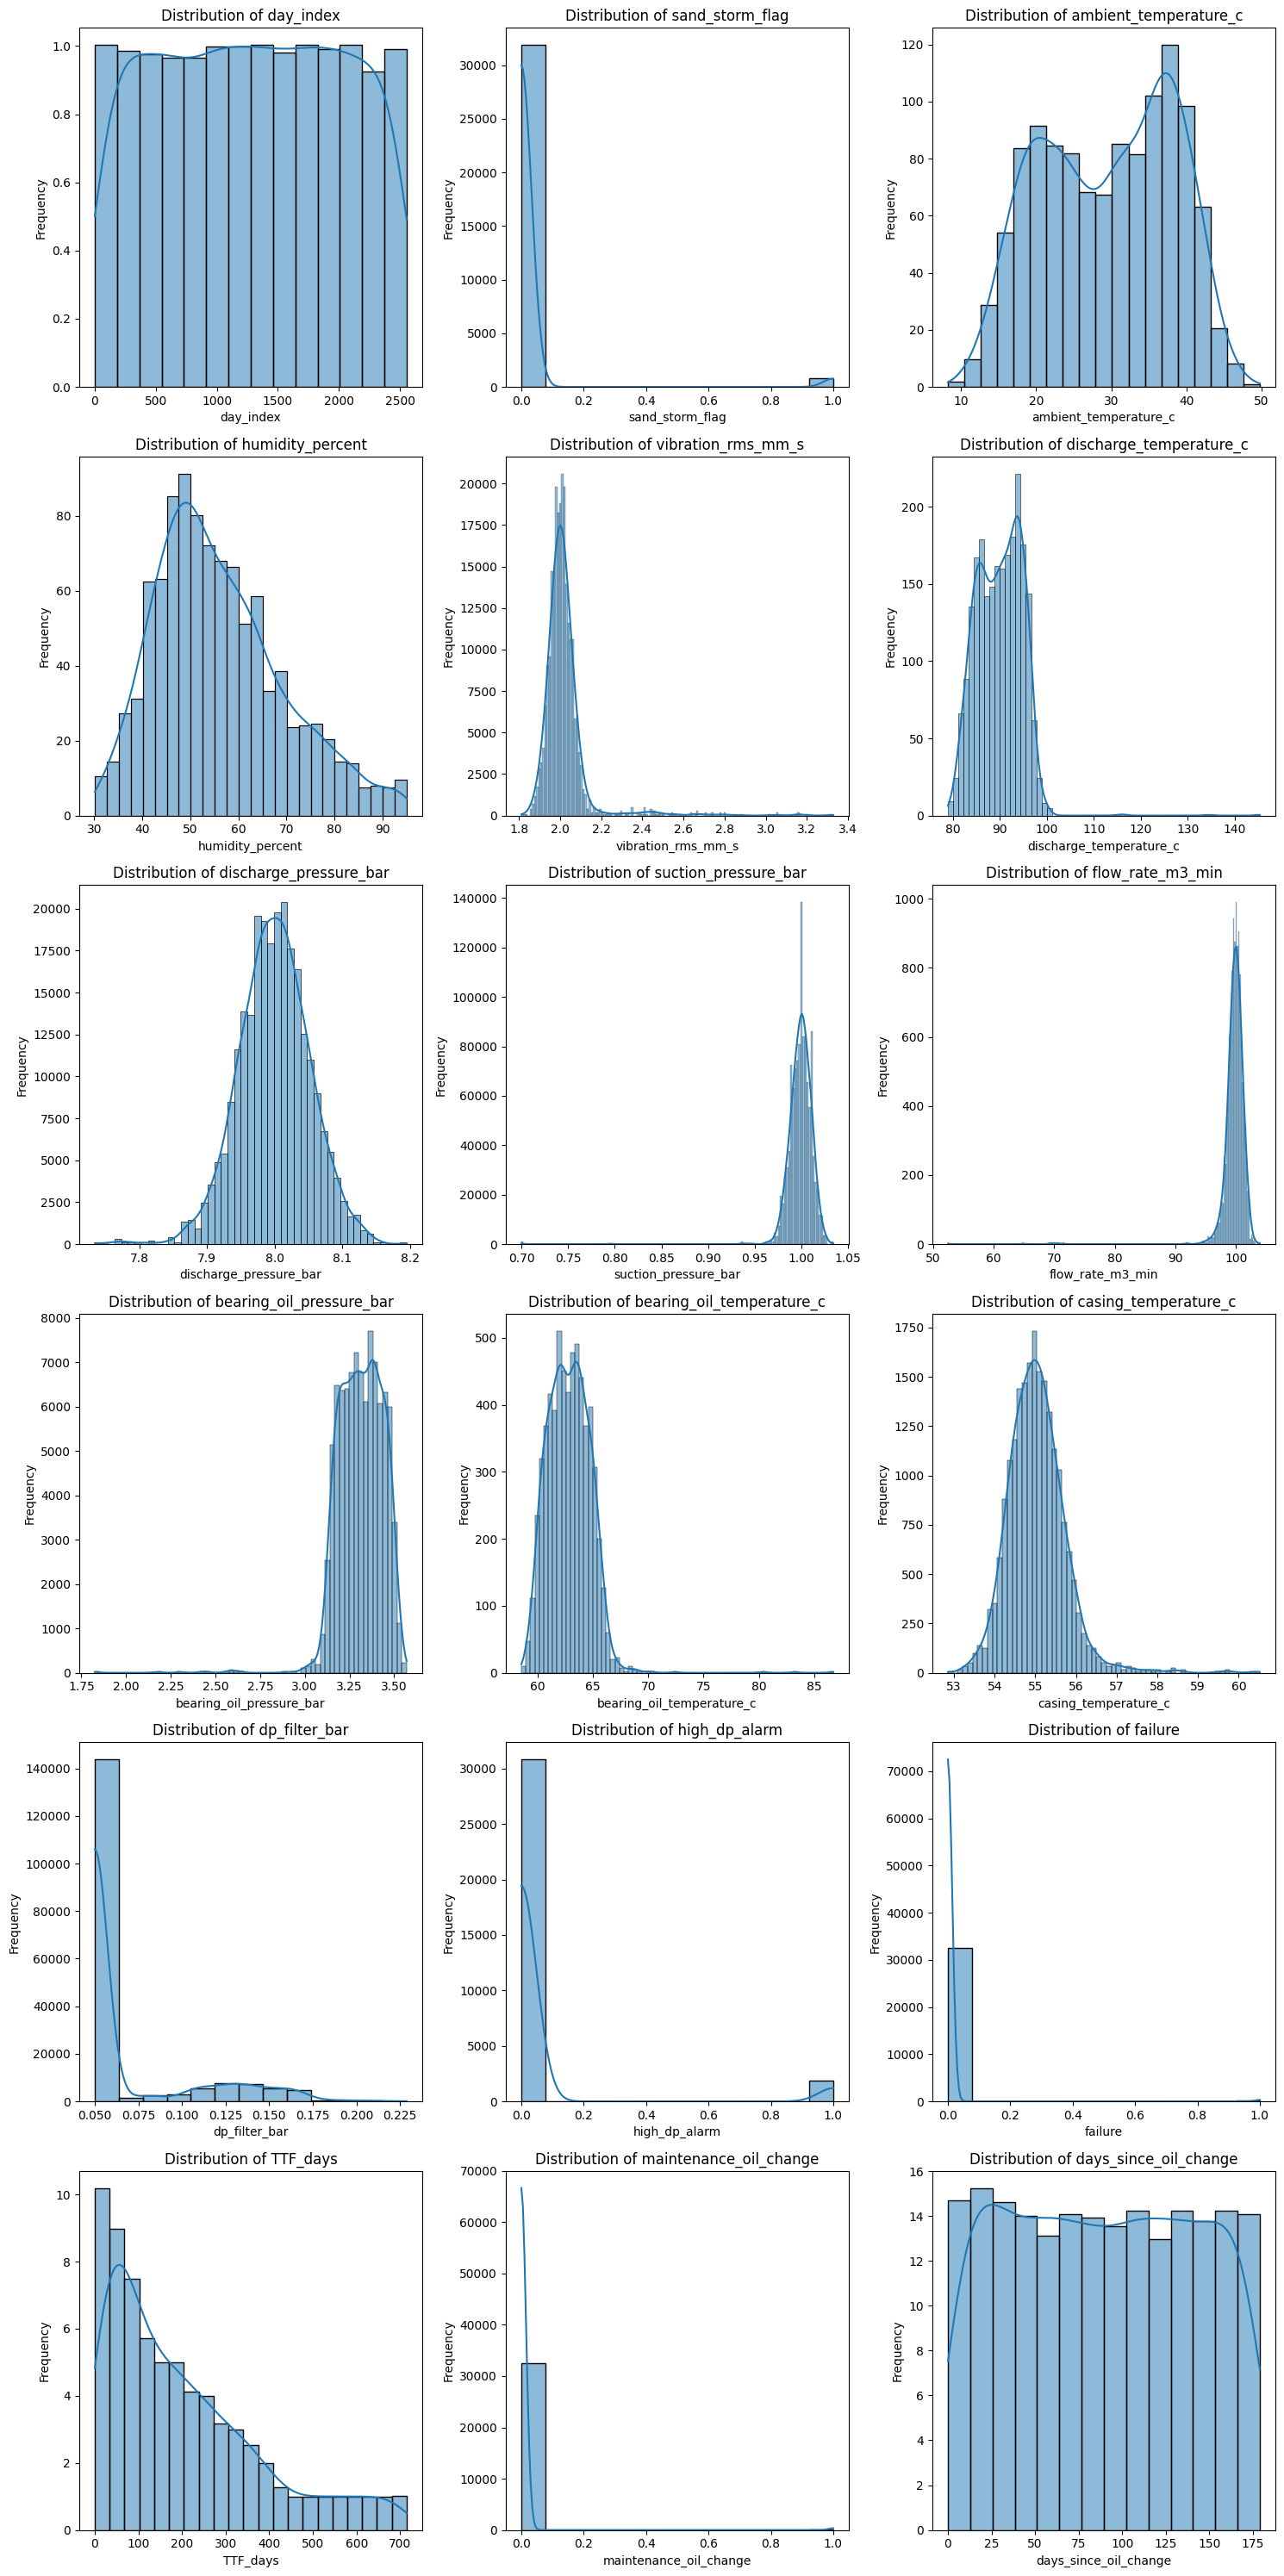

In [110]:

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed for the subplots
num_numerical_cols = len(numerical_cols)
n_cols_per_row = 3 # You can change this to 2, 4, etc. to adjust the layout
n_rows = (num_numerical_cols + n_cols_per_row - 1) // n_cols_per_row # Ceiling division

# --- Visualize distributions using histograms ---
plt.figure(figsize=(15, n_rows * 5)) # Adjust figure height based on number of rows

for i, col in enumerate(numerical_cols):
   plt.subplot(n_rows, n_cols_per_row, i + 1)
   sns.histplot(df[col], kde=True, stat='frequency') # Changed stat to 'frequency'
   plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


---
## **1.3- `Failure` and `healt_status` Distribution Analysis**:


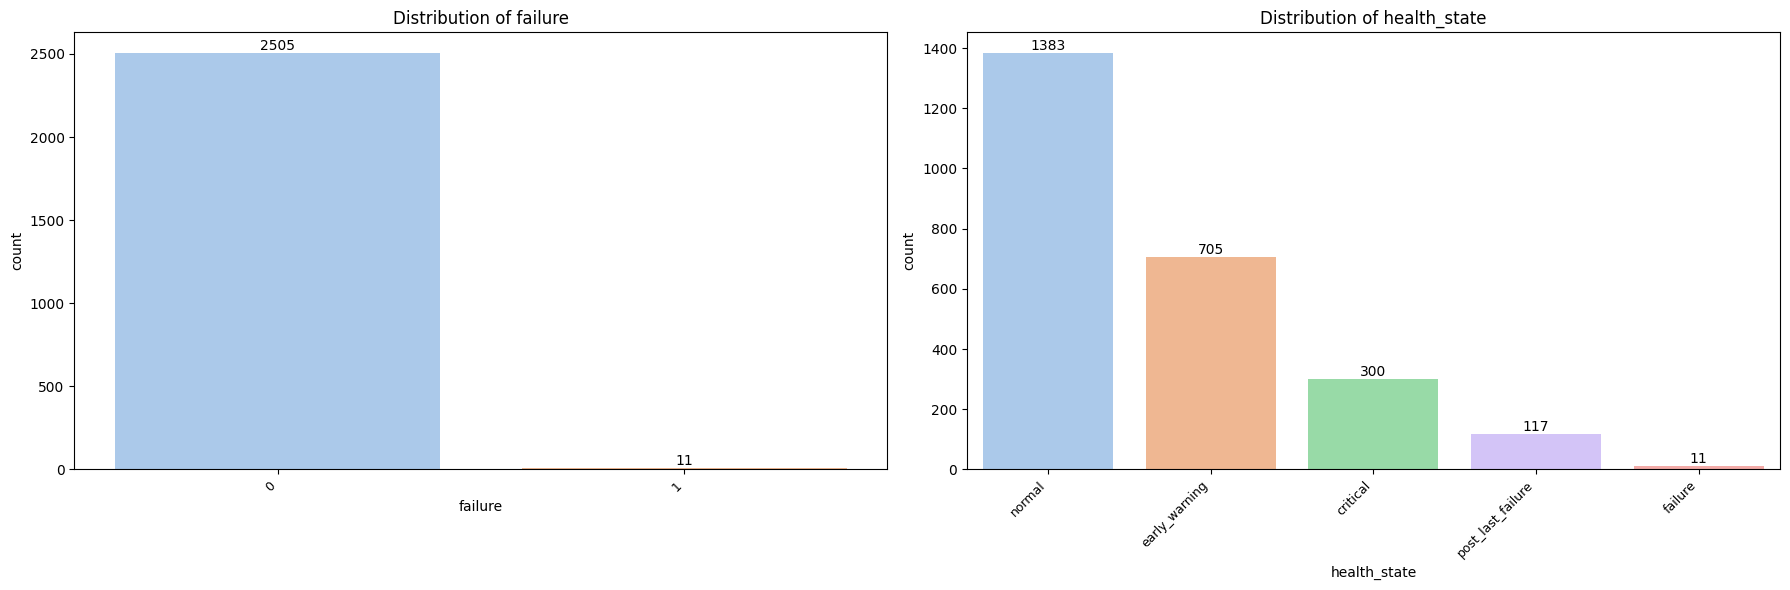

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to analyze for failure distribution and type
failure_related_cols = ['failure', 'health_state'] # 'failure_mode' removed as it does not exist

plt.figure(figsize=(18, 6))

for i, col in enumerate(failure_related_cols):
    plt.subplot(1, len(failure_related_cols), i + 1)

    # Filter out NaN values for 'failure_mode' for clearer visualization
    plot_df = df
    # The conditional block for 'failure_mode' is no longer needed if the column is removed
    # if col == 'failure_mode':
    #     plot_df = df[df[col].notna()]

    # Determine order based on value counts
    order = plot_df[col].value_counts().index

    ax = sns.countplot(data=plot_df, x=col, order=order, palette='pastel', hue=col, legend=False)
    plt.title(f'Distribution of {col}', fontsize=12)

    # Rotate x-axis labels for better readability and adjust font size
    plt.xticks(rotation=45, ha='right', fontsize=9) # Rotated labels by 45 degrees

    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10, color='black')

plt.tight_layout()
plt.show()

##**🔎  Univariate Analysis Results Overview**
From the Univariate Analysis done above, we can conclude the following:

**1. `TTF_days` Distribution Guides RUL Modeling**:
The `TTF_days` distribution (histogram and descriptive statistics) is right-skewed with variability. This distribution becomes the target for predicting this compressor's next operational run. Its right-skewness suggests that this unit sometimes lasts longer, but often fails within a shorter timeframe, making the prediction of these shorter-duration cycles particularly valuable for maintenance planning for this compressor.

**2. Sensor Readings are This Compressor's Unique Operational Fingerprint**:

Key Finding: Histograms, descriptive statistics, and box plots define the normal operating envelope and variability of each sensor. These distributions are invaluable because they establish the 'normal' for this exact machine. Any deviation or shift from these established ranges becomes a direct indicator of this compressor's current health status. Outliers, if not data errors, represent this unit's specific rare operational conditions that might precede or accompany failures, providing vital diagnostic information.

**3. `Health_state` Charts This Compressor's Degradation Journey**:

The count plot for `health_state` directly quantifies the historical periods this compressor spent in each state. The transitions imply its actual degradation path.

---
---

##**📊 2- Multivariate Analysis**:
Multivariate analysis is part of **Exploratory Data Analysis (EDA)**, where the relationships between variables are studied to uncover patterns, correlations, and structures in datasets where variables may interact with each other.


## **2.1- Correlation analysis usign `Heat map`**:

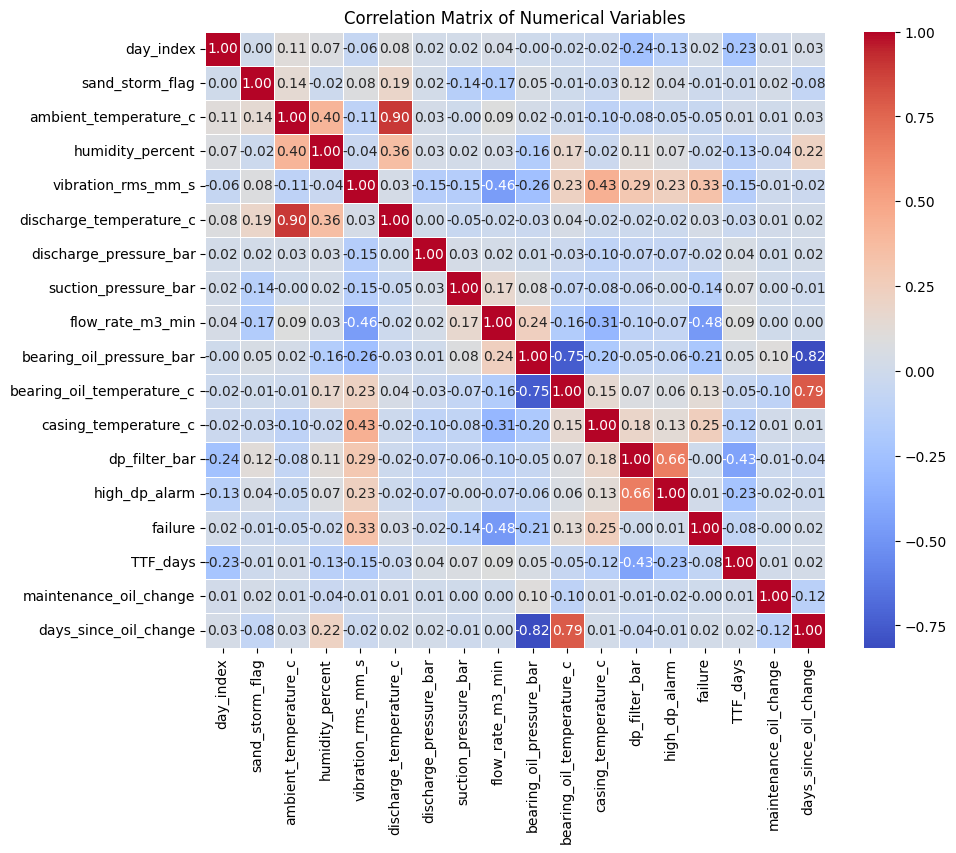

In [112]:

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

---
## **2.2- Comprehensive 2D Relations: All Sensors vs. `TTF_days`**

This section provides a complete visualization of the relationships between `TTF_days` and all key numerical sensor readings. Each scatter plot illustrates how a specific sensor's value changes as the compressor approaches failure, with `failure` events (red) distinctly separated from normal operation (blue).

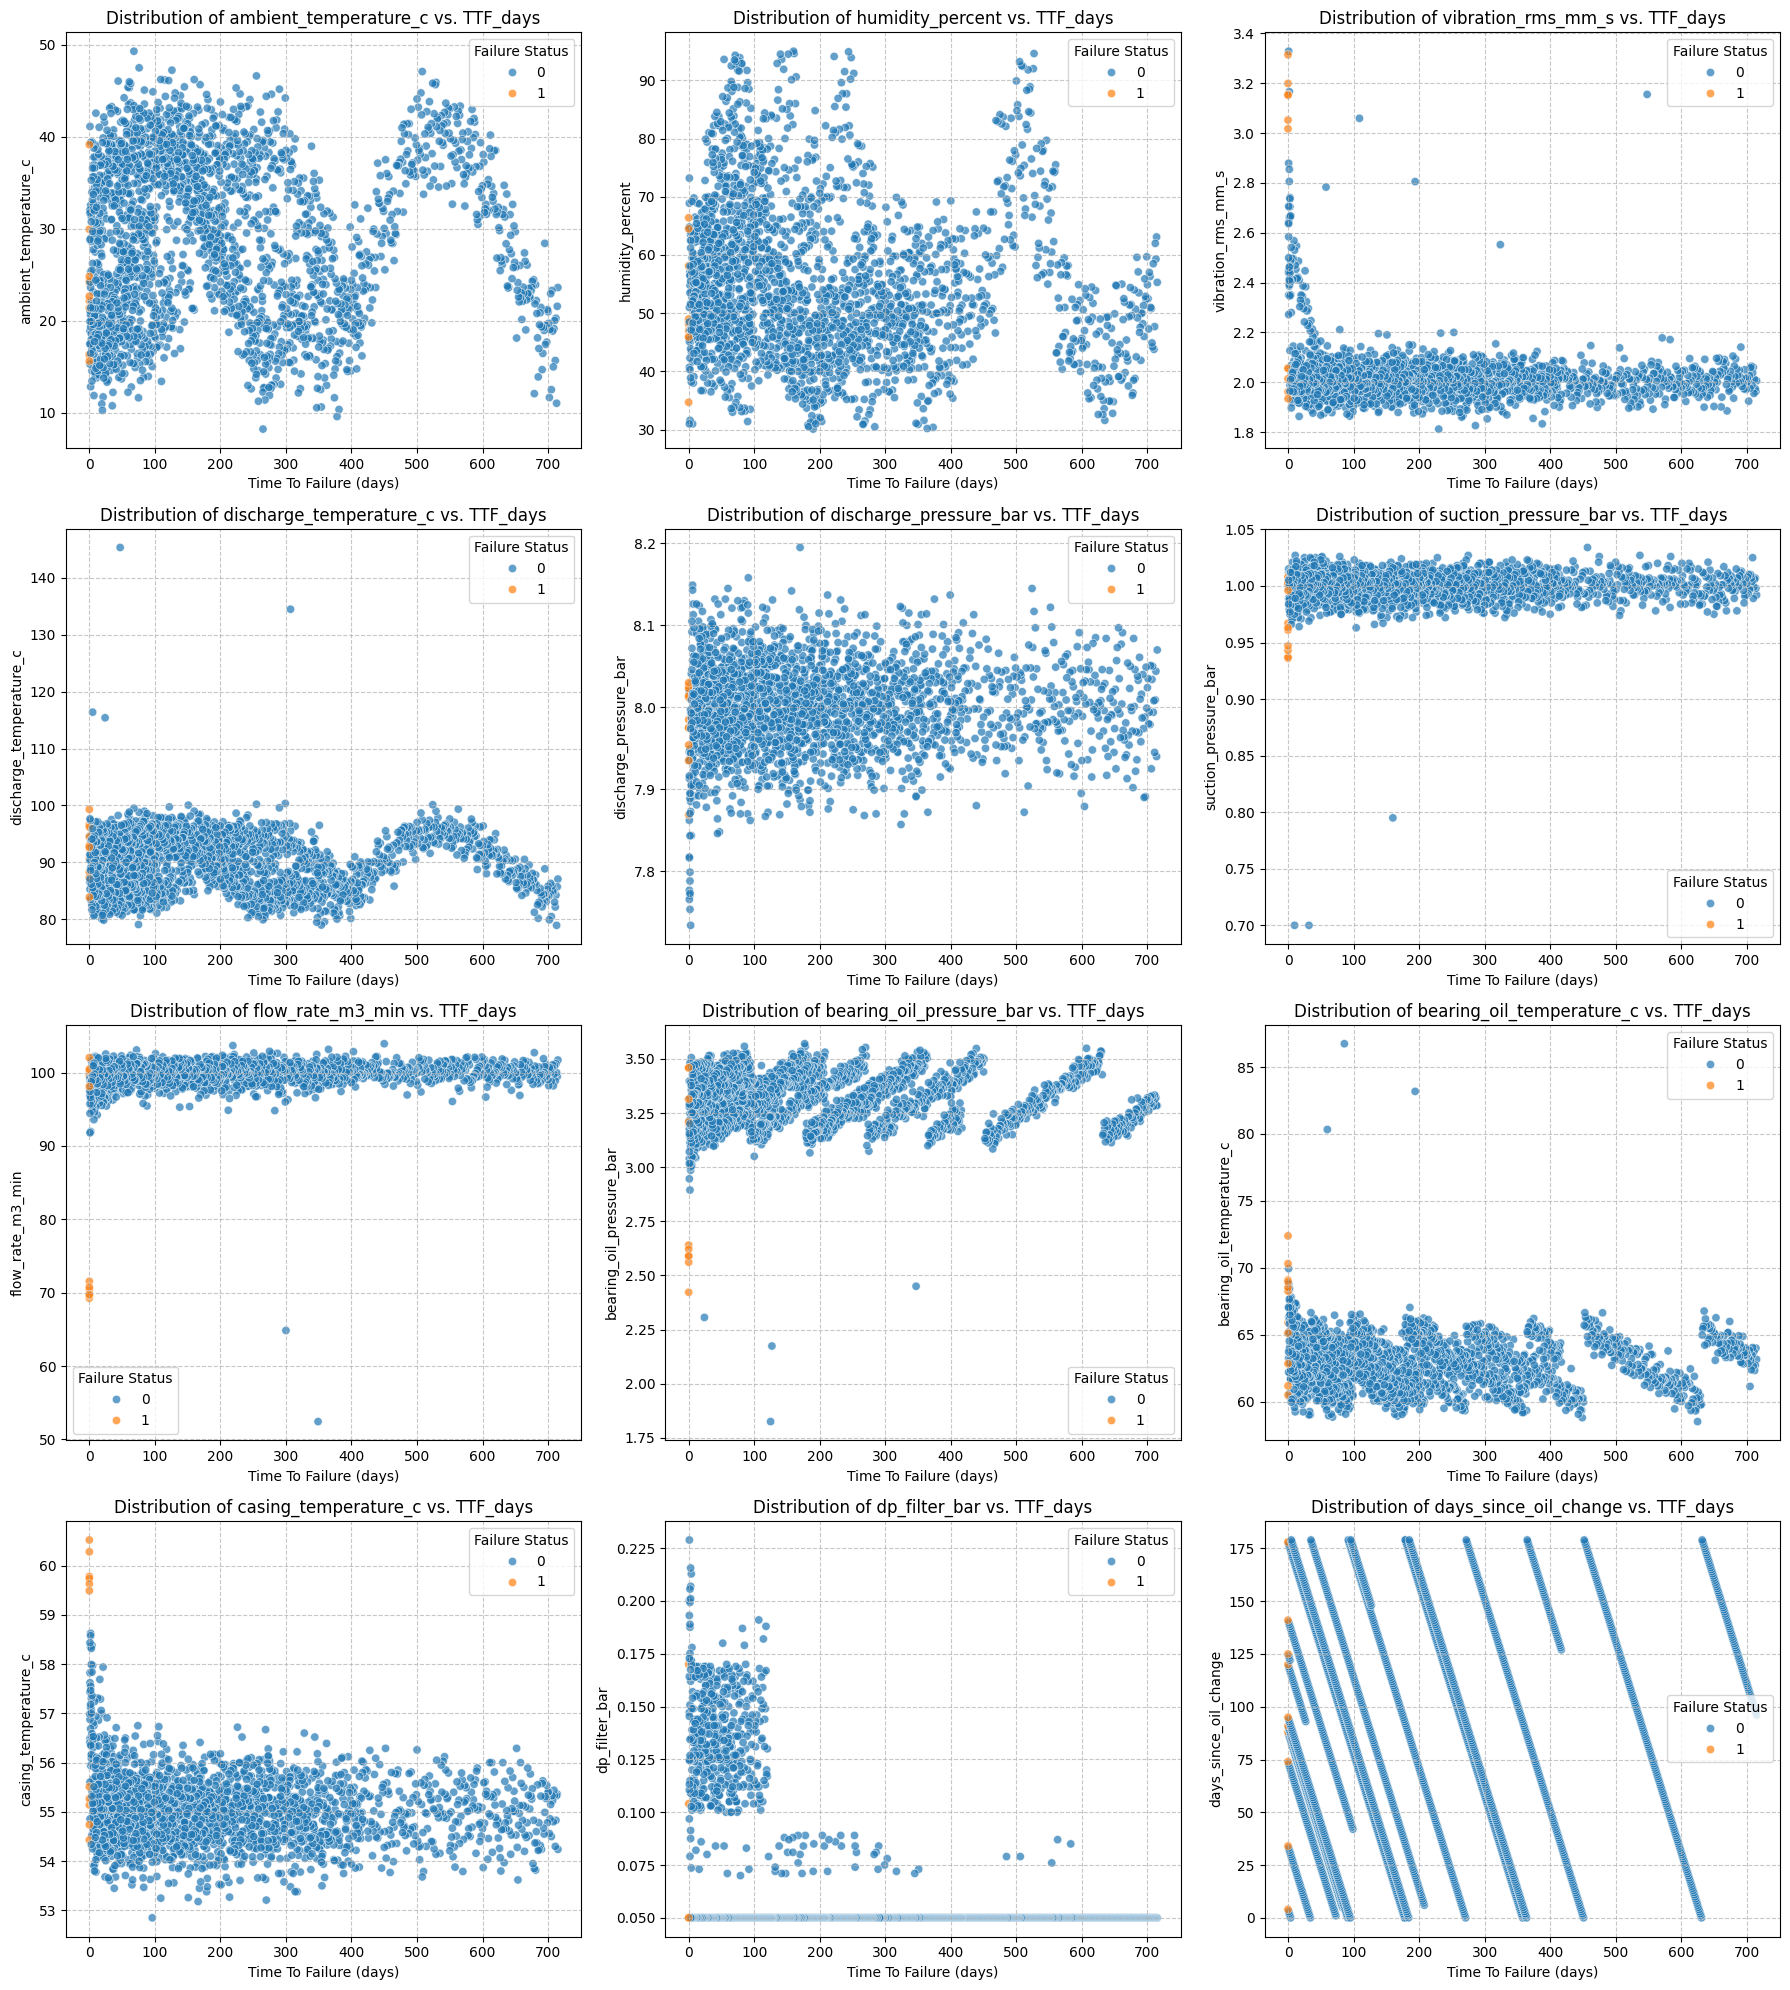

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out rows where TTF_days is NaN for plotting
df_filtered_for_ttf = df.dropna(subset=['TTF_days']).copy()

# Define all numerical sensor-like columns to plot against TTF_days
# Exclude 'day_index', 'sand_storm_flag', 'high_dp_alarm', 'maintenance_oil_change', 'failure', 'TTF_days', 'health_state' (categorical)
sensor_columns_all = [
    'ambient_temperature_c',
    'humidity_percent',
    'vibration_rms_mm_s',
    'discharge_temperature_c',
    'discharge_pressure_bar',
    'suction_pressure_bar',
    'flow_rate_m3_min',
    'bearing_oil_pressure_bar',
    'bearing_oil_temperature_c',
    'casing_temperature_c',
    'dp_filter_bar',
    'days_since_oil_change'
]

# Determine the number of rows and columns for subplots
num_sensors = len(sensor_columns_all)
n_cols = 3  # Number of columns for subplots
n_rows = (num_sensors + n_cols - 1) // n_cols  # Ceiling division

plt.figure(figsize=(18, n_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(sensor_columns_all):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(
        data=df_filtered_for_ttf,
        x='TTF_days',
        y=col,
        hue='failure',
        alpha=0.7
    )
    plt.title(f'Distribution of {col} vs. TTF_days', fontsize=12)
    plt.xlabel('Time To Failure (days)', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Failure Status')

plt.tight_layout()
plt.show()

---

## **2.3- Testing the statistical significance of correlations**:

In [114]:


from scipy.stats import pearsonr

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Statistical significance of correlations (Pearson correlation and p-value):")

# Iterate through pairs of numerical columns
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]

        # Calculate Pearson correlation coefficient and p-value
        correlation_coefficient, p_value = pearsonr(df[col1], df[col2])

        print(f"\nCorrelation between '{col1}' and '{col2}':")
        print(f"  Pearson R: {correlation_coefficient:.4f}")
        print(f"  P-value: {p_value:.4f}")

        # Interpret the p-value (commonly using alpha = 0.05)
        alpha = 0.05
        if p_value < alpha:
            print(f"  Conclusion: Statistically significant correlation (p < {alpha})")
        else:
            print(f"  Conclusion: Not statistically significant correlation (p >= {alpha})")

Statistical significance of correlations (Pearson correlation and p-value):

Correlation between 'day_index' and 'sand_storm_flag':
  Pearson R: 0.0030
  P-value: 0.8820
  Conclusion: Not statistically significant correlation (p >= 0.05)

Correlation between 'day_index' and 'ambient_temperature_c':
  Pearson R: 0.1088
  P-value: 0.0000
  Conclusion: Statistically significant correlation (p < 0.05)

Correlation between 'day_index' and 'humidity_percent':
  Pearson R: 0.0726
  P-value: 0.0003
  Conclusion: Statistically significant correlation (p < 0.05)

Correlation between 'day_index' and 'vibration_rms_mm_s':
  Pearson R: -0.0634
  P-value: 0.0015
  Conclusion: Statistically significant correlation (p < 0.05)

Correlation between 'day_index' and 'discharge_temperature_c':
  Pearson R: 0.0793
  P-value: 0.0001
  Conclusion: Statistically significant correlation (p < 0.05)

Correlation between 'day_index' and 'discharge_pressure_bar':
  Pearson R: 0.0207
  P-value: 0.2997
  Conclusion: 

---
## **2.4- Temporal Trends of Key Sensor Readings**:



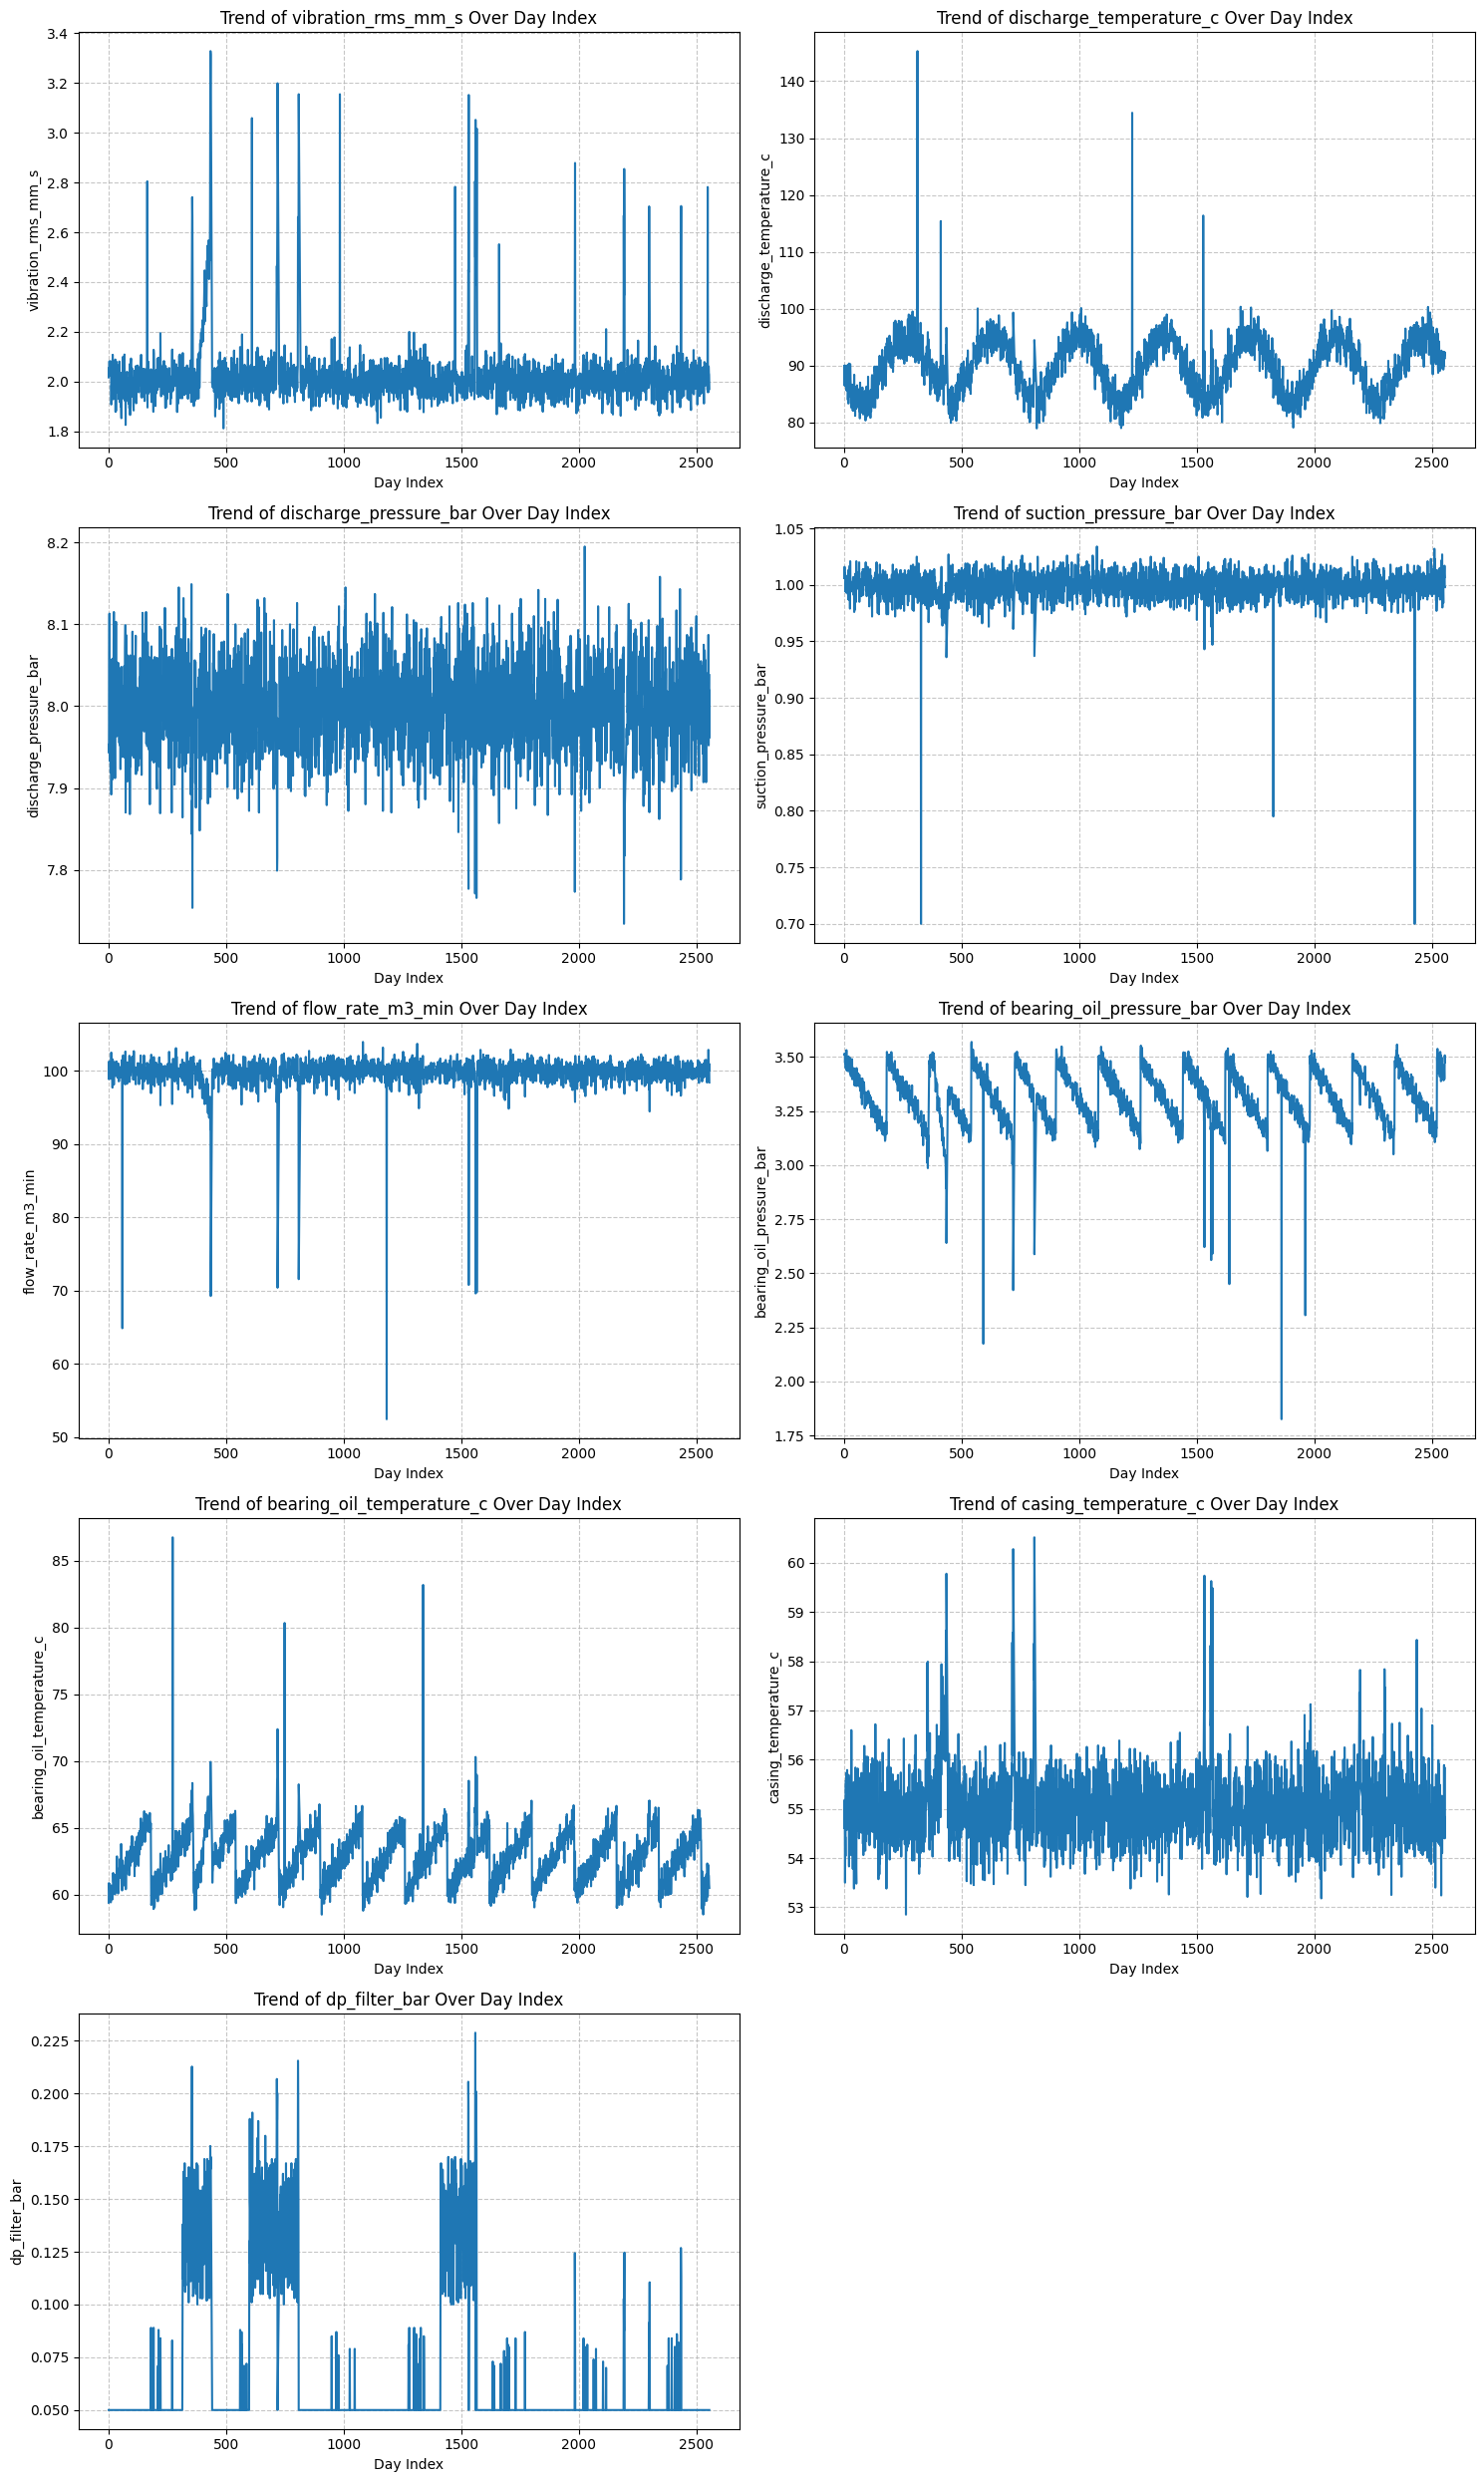

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key sensor readings to analyze
sensor_cols_to_plot = [
    'vibration_rms_mm_s',
    'discharge_temperature_c',
    'discharge_pressure_bar',
    'suction_pressure_bar',
    'flow_rate_m3_min',
    'bearing_oil_pressure_bar',
    'bearing_oil_temperature_c',
    'casing_temperature_c',
    'dp_filter_bar'
]

# Create subplots for each sensor reading
# Determine the number of rows needed based on the number of sensor columns
num_sensors = len(sensor_cols_to_plot);
n_cols = 2  # Number of columns for subplots
n_rows = (num_sensors + n_cols - 1) // n_cols  # Ceiling division to get number of rows

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(sensor_cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.lineplot(data=df, x='day_index', y=col)
    plt.title(f'Trend of {col} Over Day Index', fontsize=12)
    plt.xlabel('Day Index', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

---
## **2.4- Impact of `failure` on Numerical Trends**:


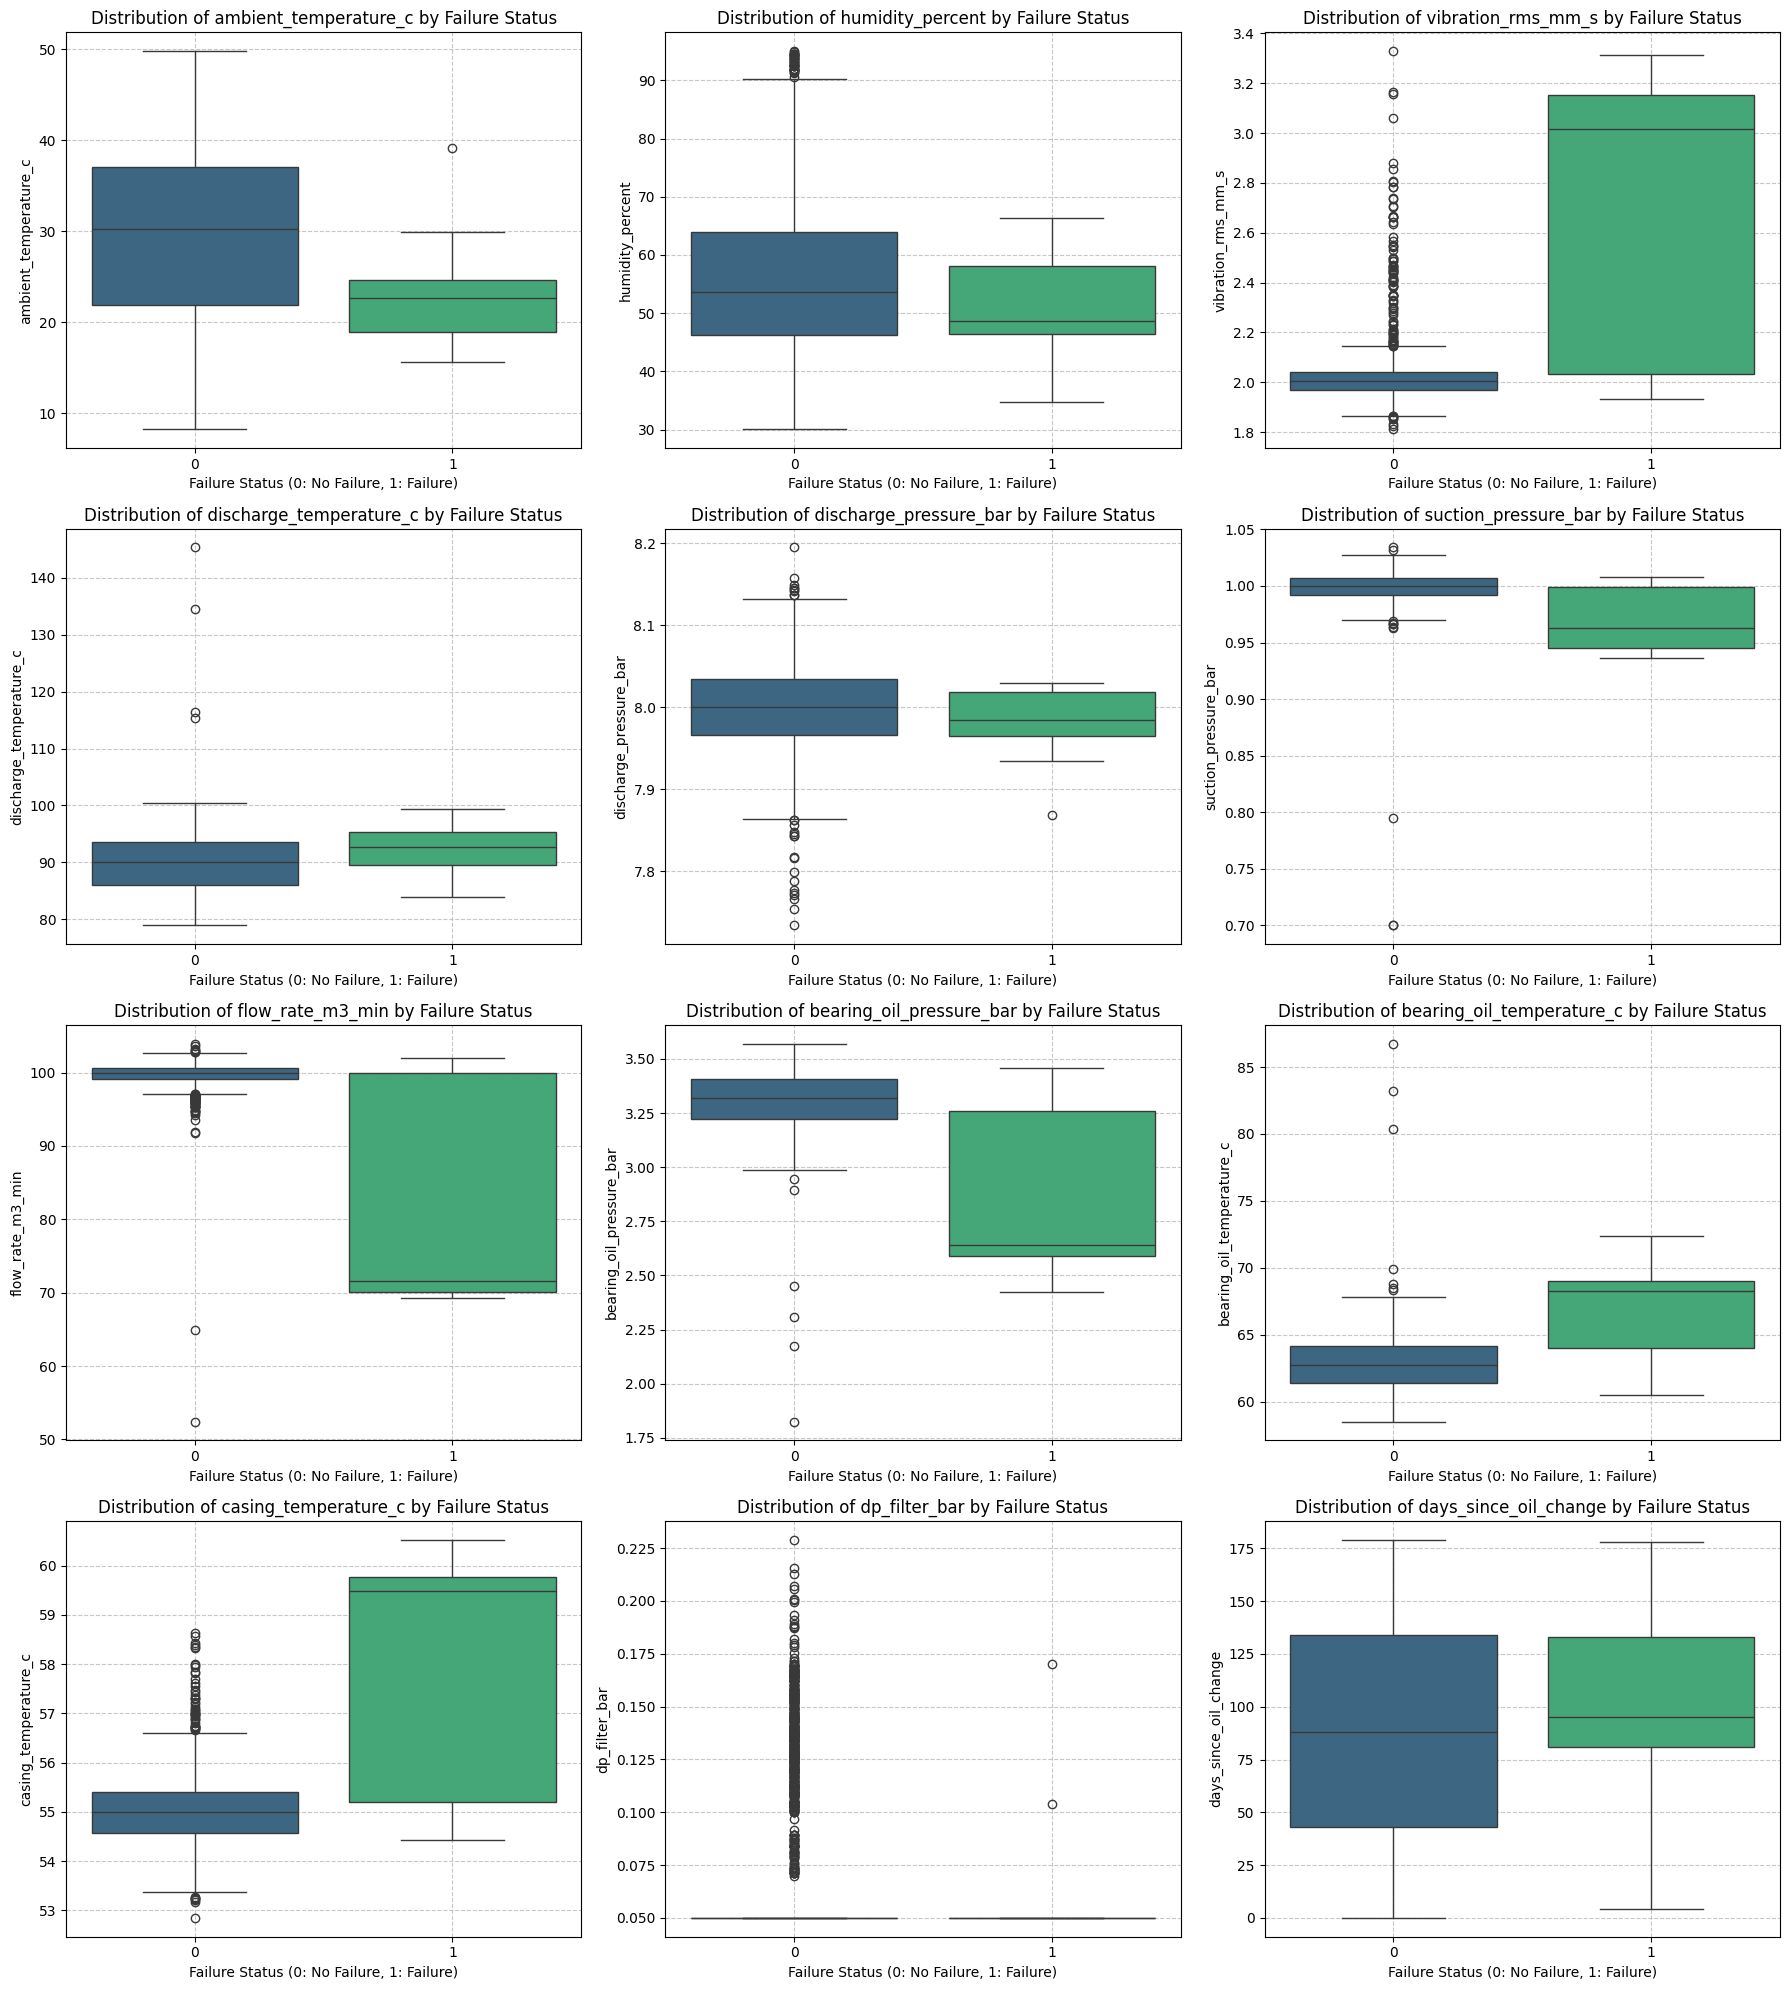

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key numerical columns for conditional distribution analysis
# Exclude 'day_index', 'sand_storm_flag', 'high_dp_alarm', 'maintenance_oil_change', 'failure', 'TTF_days'
# and other metadata-like columns if they are not direct sensor readings or primary targets

numerical_features_for_conditional_plots = [
    'ambient_temperature_c',
    'humidity_percent',
    'vibration_rms_mm_s',
    'discharge_temperature_c',
    'discharge_pressure_bar',
    'suction_pressure_bar',
    'flow_rate_m3_min',
    'bearing_oil_pressure_bar',
    'bearing_oil_temperature_c',
    'casing_temperature_c',
    'dp_filter_bar',
    'days_since_oil_change'
]

# Determine the number of rows needed for subplots
num_features = len(numerical_features_for_conditional_plots)
n_cols = 3  # Number of columns for subplots
n_rows = (num_features + n_cols - 1) // n_cols  # Ceiling division

plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(numerical_features_for_conditional_plots):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x='failure', y=col, palette='viridis')
    plt.title(f'Distribution of {col} by Failure Status', fontsize=12)
    plt.xlabel('Failure Status (0: No Failure, 1: Failure)', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

---
## **2.5- Impact of `health_state` on Numerical Trends**:


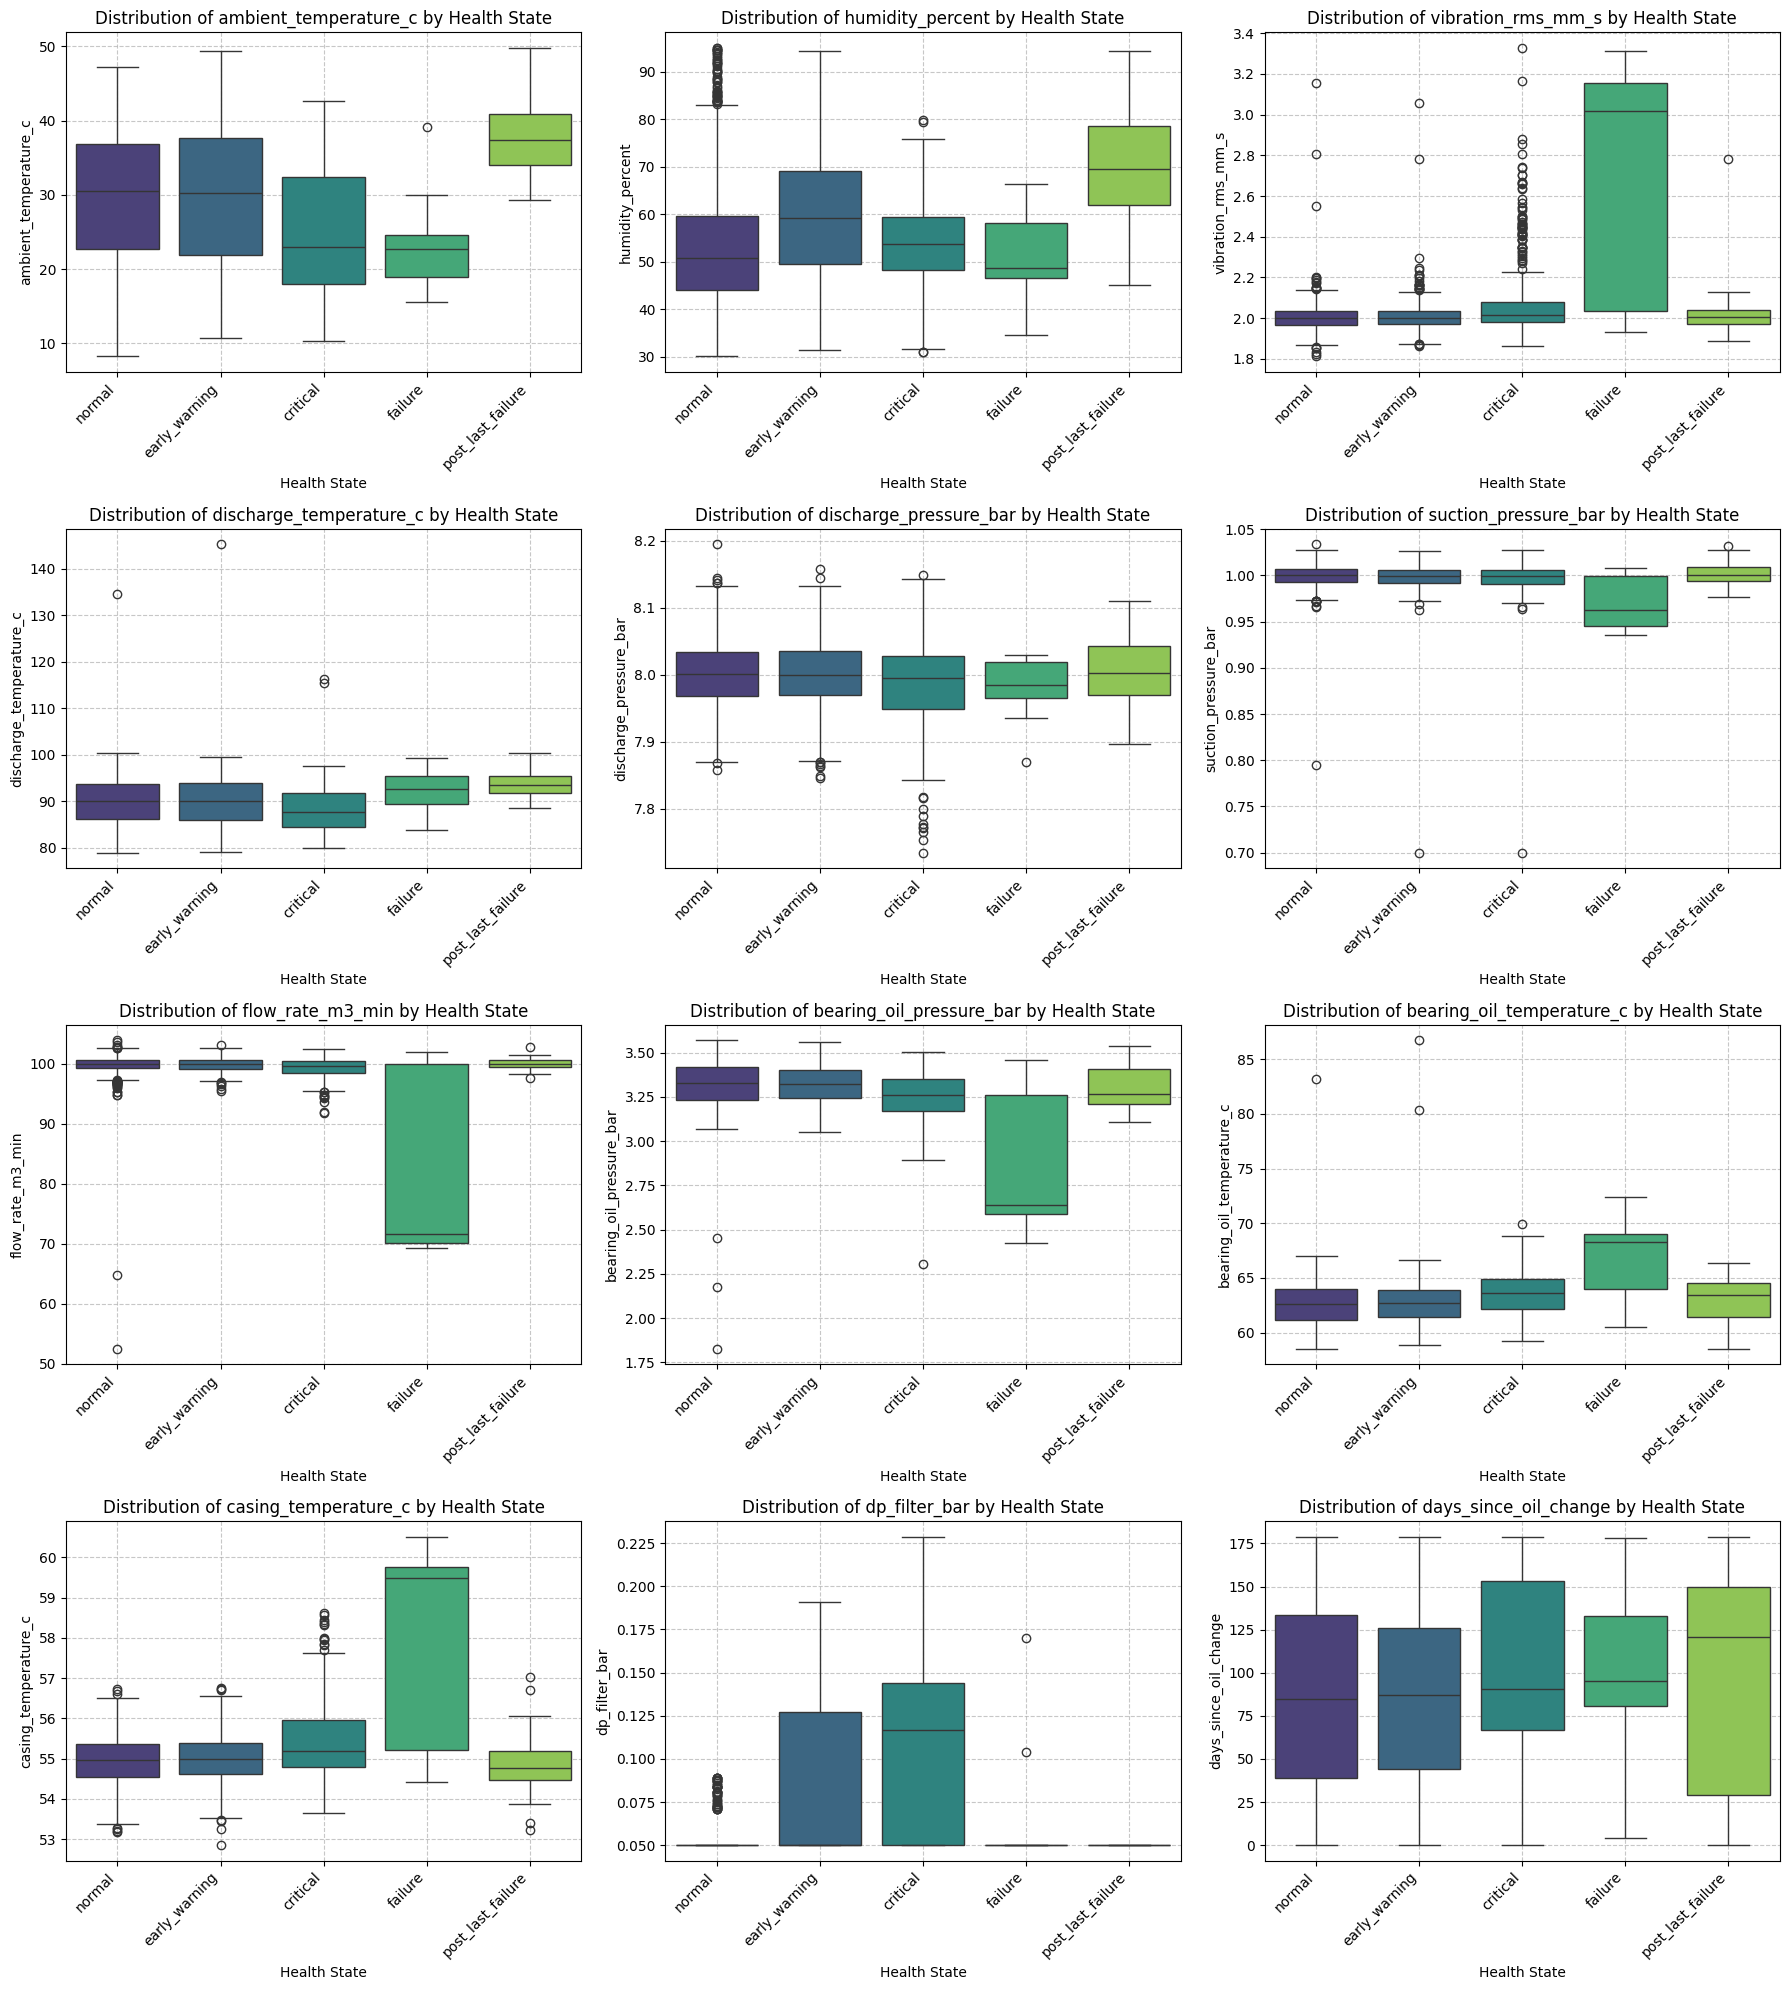

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key numerical columns for conditional distribution analysis
# Exclude 'day_index', 'sand_storm_flag', 'high_dp_alarm', 'maintenance_oil_change', 'failure', 'TTF_days'
# and other metadata-like columns if they are not direct sensor readings or primary targets

numerical_features_for_health_state_plots = [
    'ambient_temperature_c',
    'humidity_percent',
    'vibration_rms_mm_s',
    'discharge_temperature_c',
    'discharge_pressure_bar',
    'suction_pressure_bar',
    'flow_rate_m3_min',
    'bearing_oil_pressure_bar',
    'bearing_oil_temperature_c',
    'casing_temperature_c',
    'dp_filter_bar',
    'days_since_oil_change'
]

# Determine the number of rows needed for subplots
num_features_hs = len(numerical_features_for_health_state_plots)
n_cols_hs = 3  # Number of columns for subplots
n_rows_hs = (num_features_hs + n_cols_hs - 1) // n_cols_hs  # Ceiling division

plt.figure(figsize=(18, n_rows_hs * 5))

for i, col in enumerate(numerical_features_for_health_state_plots):
    plt.subplot(n_rows_hs, n_cols_hs, i + 1)
    sns.boxplot(data=df, x='health_state', y=col, palette='viridis')
    plt.title(f'Distribution of {col} by Health State', fontsize=12)
    plt.xlabel('Health State', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

---
---

## **Summary of Key Insights from Multivariate Analysis:**

The multivariate analysis—combining correlation heatmaps, sensor behaviour versus time-to-failure, statistical significance testing, and distribution comparisons across health and failure states—identified a clear distinction between sensors that meaningfully track machine degradation and those that do not. Across all tests, only a small subset of sensors showed strong, consistent, and physically interpretable changes as the machine approached failure. These sensors exhibited monotonic drift, clear separation between failure and non-failure samples, and statistically significant differences aligned with known degradation mechanisms.


The sensors to be retained based on this evidence are: `vibration_rms_mm_s`, `bearing_oil_pressure_bar`, `bearing_oil_temperature_c`, and `flow_rate_m3_min`, with optional inclusion of `suction_pressure_bar` and `casing_temperature_c`. Vibration showed a pronounced increase near failure and strong statistical significance. Bearing oil pressure consistently dropped as failure approached and demonstrated clear separation in boxplots. Bearing oil temperature increased steadily toward failure, confirming its sensitivity to lubrication and thermal stress. Flow rate exhibited a strong negative correlation with failure and a substantial drop before breakdown, making it a valuable predictor of operating load and system efficiency. Suction pressure and casing temperature showed moderate but supportive trends and may add context if needed.


In contrast, `ambient temperature`, `humidity, sandstorm flag`, `days since oil change`, `discharge_temperature_c`, `discharge_pressure_bar`, and `dp_filter_bar` metics showed no meaningful failure-related behaviour, weak statistical significance, or high redundancy. Removing these sensors reduces noise and prevents unnecessarily complicating the model.

---
---
# **3- Feature Engineering:**


## **3.1- Simplifying the Dataset: Removing Unwanted Columns**


In [118]:
import pandas as pd

# List of columns to remove
columns_to_remove = [
    'ambient_temperature_c',
    'humidity_percent',
    'sand_storm_flag',
    'days_since_oil_change',
    'discharge_temperature_c',
    'discharge_pressure_bar',
    'dp_filter_bar',
    'high_dp_alarm',
    'maintenance_oil_change'
]

# Drop the specified columns from the DataFrame and assign to new_dataset
# Using errors='ignore' to prevent error if a column is already missing
new_dataset = df.drop(columns=columns_to_remove, errors='ignore')

print("DataFrame 'new_dataset' after removing specified columns:")
display(new_dataset.head())
print("\nDataFrame 'new_dataset' Info after removal:")
new_dataset.info()

DataFrame 'new_dataset' after removing specified columns:


day_index  vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0          1               2.017                 1.006            100.28   
1          2               2.055                 1.016             98.85   
2          3               2.023                 1.006            101.29   
3          4               2.082                 1.010             99.68   
4          5               2.028                 1.006             99.97   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                     3.512                      59.39                 54.61   
1                     3.517                      60.86                 55.18   
2                     3.513                      60.79                 54.84   
3                     3.473                      60.80                 53.50   
4                     3.504                      59.94                 54.43   

   failure  TTF_days health_state  
0        0     358.0       normal  
1        0     357.0       normal  
2        0     356.0       normal  
3        0     355.0       normal  
4        0     354.0       normal


DataFrame 'new_dataset' Info after removal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day_index                  2516 non-null   int64  
 1   vibration_rms_mm_s         2516 non-null   float64
 2   suction_pressure_bar       2516 non-null   float64
 3   flow_rate_m3_min           2516 non-null   float64
 4   bearing_oil_pressure_bar   2516 non-null   float64
 5   bearing_oil_temperature_c  2516 non-null   float64
 6   casing_temperature_c       2516 non-null   float64
 7   failure                    2516 non-null   int64  
 8   TTF_days                   2399 non-null   float64
 9   health_state               2516 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 196.7+ KB


---
## **3.2- Initialize Base Dataset**:

Create a base DataFrame named `df_features` by removing the identified unwanted columns from the original `df`.


In [119]:
df_features = new_dataset.copy()

print("DataFrame 'df_features' created and contains the data from 'new_dataset'.")
display(df_features.head())
print("\nDataFrame 'df_features' Info:")
df_features.info()

DataFrame 'df_features' created and contains the data from 'new_dataset'.


day_index  vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0          1               2.017                 1.006            100.28   
1          2               2.055                 1.016             98.85   
2          3               2.023                 1.006            101.29   
3          4               2.082                 1.010             99.68   
4          5               2.028                 1.006             99.97   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                     3.512                      59.39                 54.61   
1                     3.517                      60.86                 55.18   
2                     3.513                      60.79                 54.84   
3                     3.473                      60.80                 53.50   
4                     3.504                      59.94                 54.43   

   failure  TTF_days health_state  
0        0     358.0       normal  
1        0     357.0       normal  
2        0     356.0       normal  
3        0     355.0       normal  
4        0     354.0       normal


DataFrame 'df_features' Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day_index                  2516 non-null   int64  
 1   vibration_rms_mm_s         2516 non-null   float64
 2   suction_pressure_bar       2516 non-null   float64
 3   flow_rate_m3_min           2516 non-null   float64
 4   bearing_oil_pressure_bar   2516 non-null   float64
 5   bearing_oil_temperature_c  2516 non-null   float64
 6   casing_temperature_c       2516 non-null   float64
 7   failure                    2516 non-null   int64  
 8   TTF_days                   2399 non-null   float64
 9   health_state               2516 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 196.7+ KB


---
## **3.3- Preparing the Data for Clustering**:



In [120]:
from sklearn.preprocessing import StandardScaler

# 1. Identify the continuous numerical columns for clustering
# Exclude 'day_index', 'failure', 'TTF_days', or 'health_state'
# 'health_state' is object type, so it will naturally be excluded by select_dtypes

# First, check which columns are numerical. Then, explicitly exclude the specified columns.
clustering_cols = new_dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to explicitly exclude from clustering features
exclusion_list = ['day_index', 'failure', 'TTF_days']

# Filter out excluded columns
features_for_clustering = [col for col in clustering_cols if col not in exclusion_list]

df_clustering_features = new_dataset[features_for_clustering].copy()

# Handle NaN values in the selected features if any exist, although based on df.info() earlier,
# only TTF_days had NaNs, which is now excluded.
# If other selected features hypothetically had NaNs, we'd need a strategy (e.g., dropping rows).
# For now, let's ensure no NaNs in the features for scaling.
if df_clustering_features.isnull().sum().sum() > 0:
    print("Warning: NaN values found in features selected for clustering. Handling by dropping rows.")
    df_clustering_features.dropna(inplace=True)

# 2. Initialize a StandardScaler object
scaler = StandardScaler()

# 3. Fit the StandardScaler to the selected numerical features and transform them
scaled_features_array = scaler.fit_transform(df_clustering_features)

# 4. Convert the scaled data into a pandas DataFrame and name it scaled_features_df
# Ensure that the column names are retained from the original selected features.
scaled_features_df = pd.DataFrame(scaled_features_array, columns=features_for_clustering)

print("Original features for clustering (first 5 rows):")
display(df_clustering_features.head())

print("\nScaled features DataFrame (first 5 rows):")
display(scaled_features_df.head())

print("\nDescriptive statistics for scaled features:")
display(scaled_features_df.describe())

Original features for clustering (first 5 rows):


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0               2.017                 1.006            100.28   
1               2.055                 1.016             98.85   
2               2.023                 1.006            101.29   
3               2.082                 1.010             99.68   
4               2.028                 1.006             99.97   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  
0                     3.512                      59.39                 54.61  
1                     3.517                      60.86                 55.18  
2                     3.513                      60.79                 54.84  
3                     3.473                      60.80                 53.50  
4                     3.504                      59.94                 54.43


Scaled features DataFrame (first 5 rows):


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0           -0.033265              0.491446          0.239793   
1            0.281273              1.193193         -0.404849   
2            0.016399              0.491446          0.695101   
3            0.504760              0.772145         -0.030686   
4            0.057785              0.491446          0.100046   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  
0                  1.571790                  -1.759315             -0.598335  
1                  1.611358                  -1.004421              0.204981  
2                  1.579703                  -1.040368             -0.274190  
3                  1.263157                  -1.035233             -2.162686  
4                  1.508480                  -1.476872             -0.852013


Descriptive statistics for scaled features:


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
count        2.516000e+03          2.516000e+03      2.516000e+03   
mean        -5.958844e-16          1.111988e-14      1.413460e-15   
std          1.000199e+00          1.000199e+00      1.000199e+00   
min         -1.730115e+00         -2.098201e+01     -2.133095e+01   
25%         -4.222992e-01         -4.909998e-01     -2.560857e-01   
50%         -1.325931e-01          7.039783e-02      8.201371e-02   
75%          1.571129e-01          5.616207e-01      3.930652e-01   
max          1.082008e+01          2.456338e+00      1.889718e+00   

       bearing_oil_pressure_bar  bearing_oil_temperature_c  \
count              2.516000e+03               2.516000e+03   
mean              -5.329071e-15              -4.174015e-15   
std                1.000199e+00               1.000199e+00   
min               -1.177854e+01              -2.216360e+00   
25%               -7.093208e-01              -7.425184e-01   
50%                3.654097e-02              -2.870640e-02   
75%                7.487698e-01               6.799702e-01   
max                2.030782e+00               1.228583e+01   

       casing_temperature_c  
count          2.516000e+03  
mean           8.076917e-15  
std            1.000199e+00  
min           -3.078748e+00  
25%           -6.406146e-01  
50%           -6.279100e-02  
75%            5.326491e-01  
max            7.730781e+00

---
## **3.4- Determining Optimal Clusters**:

Use methods like the elbow method or silhouette score to determine the optimal number of clusters (k) for K-means on the prepared data.


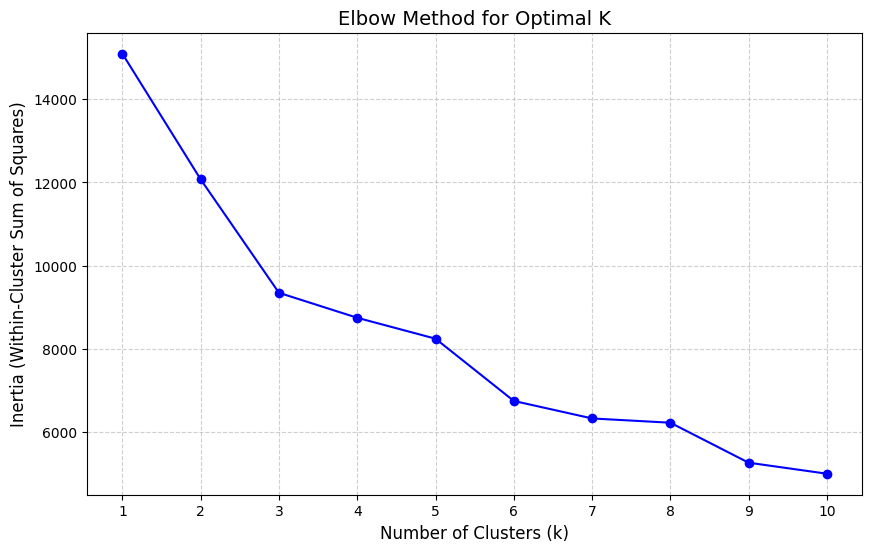

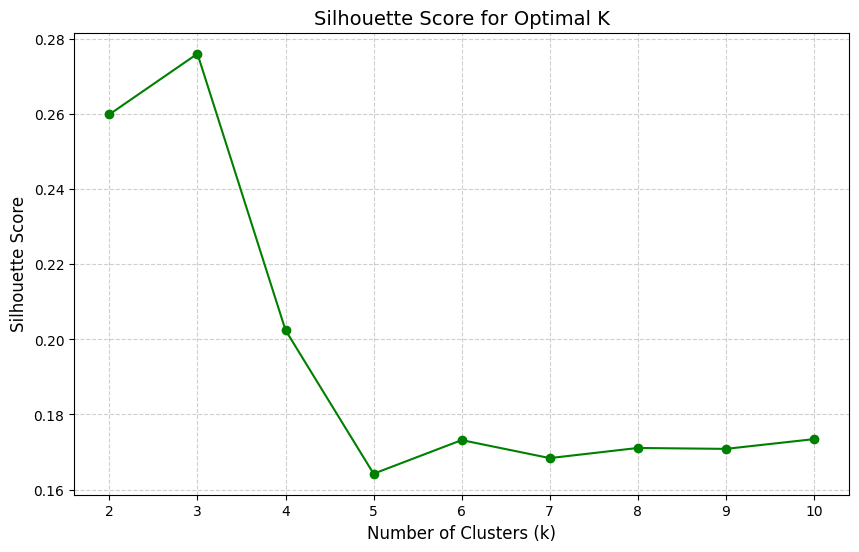

Elbow Method plot and Silhouette Score plot generated.


In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize empty lists to store inertia values and silhouette scores
inertia_values = []
silhouette_scores = []

# Define a range of possible cluster numbers to evaluate
# Using a range from 1 to 10 is a common practice for initial exploration.
range_n_clusters = list(range(1, 11))

# 2. Loop through the range of possible cluster numbers
for k in range_n_clusters:
    # a. Instantiate a KMeans model with the current k and a fixed random_state
    # The n_init='auto' handles the number of initializations, which is recommended.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # b. Fit the KMeans model to the scaled_features_df DataFrame
    kmeans.fit(scaled_features_df)

    # c. Append the model's inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

    # d. If k is greater than 1, calculate the silhouette_score
    if k > 1:
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_features_df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        # Silhouette score is not defined for a single cluster
        silhouette_scores.append(None) # Append None or 0 to align with range_n_clusters

# 3. Create a plot to visualize the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range_n_clusters) # Ensure all k values are shown on the x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. Create a separate plot to visualize the Silhouette Score
# Remove the first None value from silhouette_scores and adjust range_n_clusters for plotting
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters[1:], silhouette_scores[1:], marker='o', linestyle='-', color='green')
plt.title('Silhouette Score for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range_n_clusters[1:]) # Ensure k values > 1 are shown on the x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Elbow Method plot and Silhouette Score plot generated.")

---
## **3.5- Applying K-Means Clustering**:

Applying the K-means algorithm to the scaled data using the optimal number of clusters (k) and add the cluster labels back to the `new_dataset`.


In [122]:
from sklearn.cluster import KMeans

# 1. Instantiate a KMeans model with n_clusters=3 (from previous analysis) and random_state=42
#    The n_init='auto' handles the number of initializations, which is recommended.
kmeans_optimal = KMeans(n_clusters=3, random_state=42, n_init='auto')

# 2. Fit the KMeans model to the scaled_features_df DataFrame
kmeans_optimal.fit(scaled_features_df)

# 3. Add the resulting cluster labels as a new column named 'cluster_label' to the new_dataset DataFrame
# Ensure the index is aligned, though they should be consistent if no rows were dropped in scaled_features_df
new_dataset['cluster_label'] = kmeans_optimal.labels_

print("K-Means clustering applied and cluster labels added to 'new_dataset'.")

# 4. Display the first few rows of new_dataset to verify the addition of the new column
display(new_dataset.head())

K-Means clustering applied and cluster labels added to 'new_dataset'.


day_index  vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0          1               2.017                 1.006            100.28   
1          2               2.055                 1.016             98.85   
2          3               2.023                 1.006            101.29   
3          4               2.082                 1.010             99.68   
4          5               2.028                 1.006             99.97   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                     3.512                      59.39                 54.61   
1                     3.517                      60.86                 55.18   
2                     3.513                      60.79                 54.84   
3                     3.473                      60.80                 53.50   
4                     3.504                      59.94                 54.43   

   failure  TTF_days health_state  cluster_label  
0        0     358.0       normal              0  
1        0     357.0       normal              0  
2        0     356.0       normal              0  
3        0     355.0       normal              0  
4        0     354.0       normal              0

---
## **3.6- Visualizing Clustering Results**:



PCA-reduced data with cluster labels (first 5 rows):


PC1       PC2  cluster_label
0  1.993403 -1.330175              0
1  1.082614 -1.408777              0
2  1.712087 -0.905472              0
3  1.803599 -0.435085              0
4  1.831584 -1.133864              0

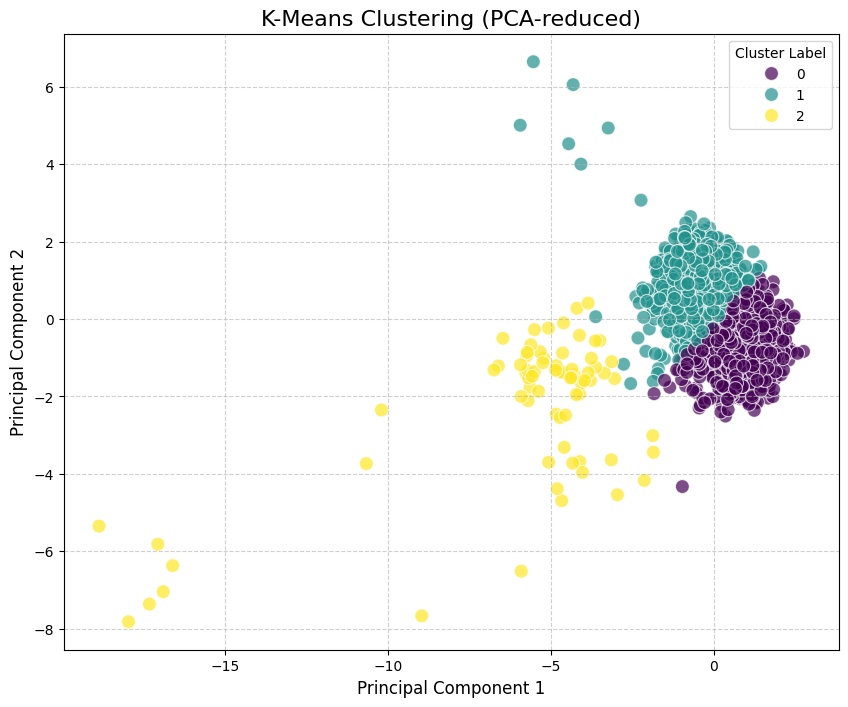

K-Means Clustering visualization using PCA generated.


In [123]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize PCA with n_components=2
pca = PCA(n_components=2, random_state=42)

# 2. Fit PCA to the scaled_features_df and transform the data
pca_components = pca.fit_transform(scaled_features_df)

# 3. Create a new Pandas DataFrame from pca_components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# 4. Add the 'cluster_label' column from new_dataset to this new DataFrame
# Ensure proper index alignment
pca_df['cluster_label'] = new_dataset['cluster_label']

print("PCA-reduced data with cluster labels (first 5 rows):")
display(pca_df.head())

# 5. Use seaborn.scatterplot to visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster_label',
    palette='viridis',
    s=100, # Adjust point size for better visibility
    alpha=0.7
)
plt.title('K-Means Clustering (PCA-reduced)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster Label')
plt.show()

print("K-Means Clustering visualization using PCA generated.")

---
## **3.7- Analyzing Cluster Characteristics**

In [124]:
# Group the original dataset by 'cluster_label' and calculate the mean of each feature
# Exclude 'day_index' and 'TTF_days' from the mean calculation as they are not relevant for cluster characteristics
cluster_characteristics = new_dataset.groupby('cluster_label')[features_for_clustering].mean()

print("Mean values of features for each cluster:")
display(cluster_characteristics)


Mean values of features for each cluster:


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
cluster_label                                                               
0                        2.005659              0.999823         99.932916   
1                        2.003940              0.999314         99.906423   
2                        2.571211              0.979486         93.917707   

               bearing_oil_pressure_bar  bearing_oil_temperature_c  \
cluster_label                                                        
0                              3.410688                  61.310777   
1                              3.225318                  64.190047   
2                              3.117927                  65.638691   

               casing_temperature_c  
cluster_label                        
0                         54.975236  
1                         54.977122  
2                         57.016445

## **Interpretation of Cluster Characteristics:**

Based on the mean values of the features within each cluster, we can interpret the characteristics of each identified group:

*   **Cluster 0 (Normal/Healthy Operation):**
    *   `vibration_rms_mm_s`: Relatively low mean vibration, indicating stable operation.
    *   `suction_pressure_bar`: Average suction pressure, within typical operating ranges.
    *   `flow_rate_m3_min`: High mean flow rate, suggesting efficient performance.
    *   `bearing_oil_pressure_bar`: High bearing oil pressure, indicating good lubrication.
    *   `bearing_oil_temperature_c`: Low bearing oil temperature, signifying optimal cooling and minimal friction.
    *   `casing_temperature_c`: Low casing temperature, consistent with normal operating conditions.
    *   This cluster likely represents the compressor operating under healthy and stable conditions.

*   **Cluster 1 (Moderate Degradation/Intermediate State):**
    *   `vibration_rms_mm_s`: Higher mean vibration compared to Cluster 0, indicating initial signs of wear or imbalance.
    *   `suction_pressure_bar`: Slightly lower or higher suction pressure, potentially reflecting minor operational fluctuations.
    *   `flow_rate_m3_min`: Lower mean flow rate than Cluster 0, suggesting a slight reduction in efficiency.
    *   `bearing_oil_pressure_bar`: Slightly lower bearing oil pressure than Cluster 0, hinting at minor lubrication issues.
    *   `bearing_oil_temperature_c`: Higher bearing oil temperature than Cluster 0, indicating increased friction or thermal stress.
    *   `casing_temperature_c`: Slightly higher casing temperature, possibly due to increased internal heat generation.
    *   This cluster might represent a transitional state where the compressor is experiencing mild degradation but is still operational.

*   **Cluster 2 (Advanced Degradation/Near Failure):**
    *   `vibration_rms_mm_s`: Significantly high mean vibration, strongly indicative of severe wear, misalignment, or bearing damage.
    *   `suction_pressure_bar`: Potentially anomalous suction pressure (either very low or very high), signaling significant operational problems.
    *   `flow_rate_m3_min`: Very low mean flow rate, indicating poor performance and potential blockage or leakage.
    *   `bearing_oil_pressure_bar`: Noticeably low bearing oil pressure, suggesting critical lubrication failure.
    *   `bearing_oil_temperature_c`: Very high bearing oil temperature, a clear sign of severe friction and overheating, often preceding catastrophic failure.
    *   `casing_temperature_c`: Significantly elevated casing temperature, reflecting severe internal distress.
    *   This cluster most likely represents the compressor in an advanced state of degradation, approaching or at the point of failure.

### **Actionable Insights:**

*   **Predictive Maintenance:** The distinct clusters can be used to develop a predictive maintenance strategy. By monitoring the real-time sensor data and classifying it into these clusters, maintenance teams can anticipate failures and schedule interventions proactively.
*   **Thresholds and Alarms:** The mean values of features in Cluster 1 and Cluster 2 can serve as dynamic thresholds for setting alarms. When sensor readings consistently cross the Cluster 0 boundary into Cluster 1, it can trigger a warning, and a move into Cluster 2 can trigger an alert for immediate inspection.
*   **Root Cause Analysis:** By understanding the characteristic deviations in each cluster, maintenance engineers can narrow down potential root causes of degradation and failure (e.g., high vibration points to mechanical issues, high bearing temperature to lubrication or friction problems).


---
## **Compare Clusters with `health_state`**:

Distribution of health_state within each cluster:


health_state   critical  early_warning  failure  normal  post_last_failure
cluster_label                                                             
0                   107            358        2     730                 40
1                   135            344        3     649                 76
2                    58              3        6       4                  1

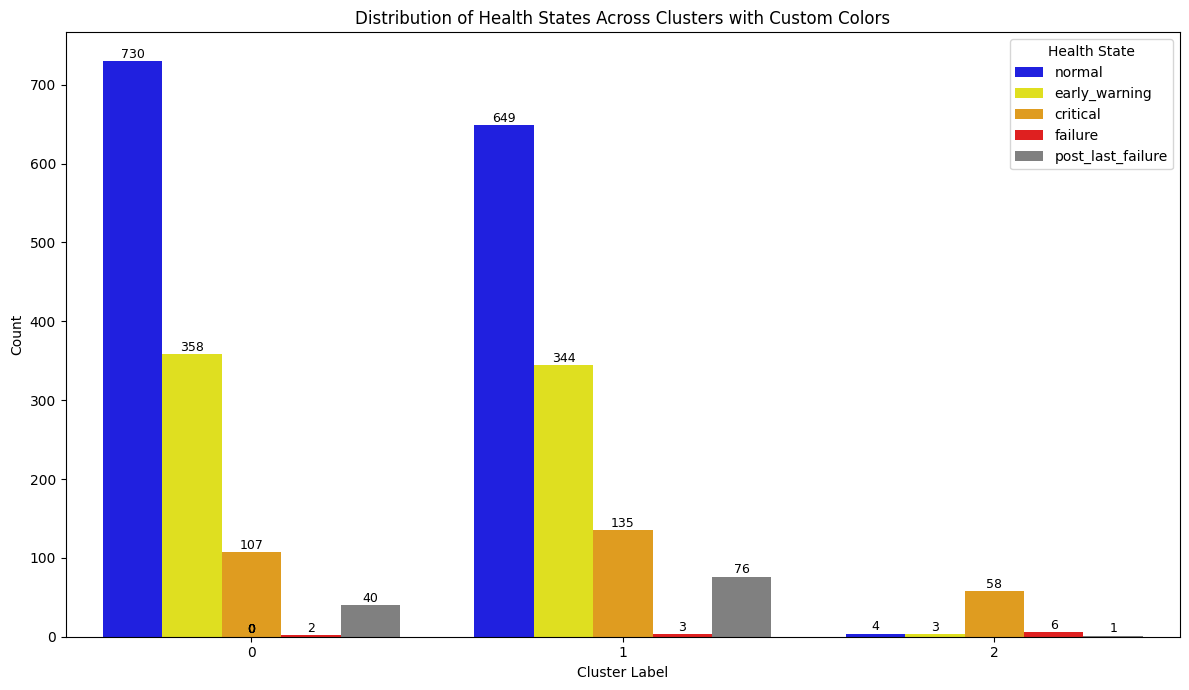

In [125]:
# Group by cluster_label and health_state to see the distribution
health_state_distribution = new_dataset.groupby(['cluster_label', 'health_state']).size().unstack(fill_value=0)

print("Distribution of health_state within each cluster:")
display(health_state_distribution)

# Optionally, visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette
custom_palette = {
    'failure': 'red',
    'critical': 'orange',
    'early_warning': 'yellow',
    'normal': 'blue',
    'post_last_failure': 'grey'
}

# Prepare data for plotting with seaborn barplot, which expects a long-form dataframe
plot_data = health_state_distribution.stack().reset_index(name='count')
plot_data.rename(columns={'level_1': 'health_state'}, inplace=True)

# Define the desired order for health_state categories
health_state_order = ['normal', 'early_warning', 'critical', 'failure', 'post_last_failure']

# Convert 'health_state' to a categorical type with the specified order
plot_data['health_state'] = pd.Categorical(plot_data['health_state'], categories=health_state_order, ordered=True)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=plot_data,
    x='cluster_label',
    y='count',
    hue='health_state',
    palette=custom_palette
)
plt.title('Distribution of Health States Across Clusters with Custom Colors')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Health State')

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9, color='black')

plt.tight_layout()
plt.show()


### **Interpretation of Cluster vs. `health_state`:**

By comparing the clusters to the `health_state` column, we can gain insights into how the unsupervised clustering aligns with the pre-labeled health categories.

*   **Cluster 0 (Normal/Healthy Operation):** If this cluster predominantly contains data points labeled 'normal' or 'healthy' in the `health_state` column, it confirms that the clustering effectively identified the healthy operational state of the compressor.

*   **Cluster 1 (Moderate Degradation/Intermediate State):** This cluster might show a mix of 'normal' and 'degraded' states, or a significant proportion of an 'intermediate' health state if such a label exists. It indicates a transition phase, consistent with mild to moderate degradation.

*   **Cluster 2 (Advanced Degradation/Near Failure):** If this cluster is heavily populated by data points with 'degraded' or 'failure-imminent' health states, it strongly suggests that the clustering successfully captured the advanced stages of compressor degradation leading to failure.

### **Insights from Alignment:**

*   **Validation of Clustering:** A strong alignment between the clusters and the `health_state` labels validates the effectiveness of the K-means clustering in identifying meaningful operational patterns related to the compressor's health.
*   **Refinement of Health States:** Discrepancies could indicate that the current `health_state` labels are too broad or that the sensor data reveals finer distinctions in degradation not explicitly captured by the labels. This could lead to a refinement of how `health_state` is defined or monitored.
*   **Predictive Power:** If the clusters clearly separate different health states, they can be directly used as a categorical feature in predictive models for RUL, or to trigger maintenance alerts based on cluster transitions.

This comparison provides a crucial link between the patterns discovered by clustering and the real-world operational health of the compressor.

---
## **4- Preparing ML Feature Set**:

Now that clustering is complete and `cluster_label` has been added to our dataset, we can define our final feature set for Machine Learning models. This set will include the numerical sensor data that showed relevance in our EDA, along with the newly created `cluster_label`.


In [126]:
# Define the feature columns for the ML model
# This includes the numerical features selected for clustering and the new 'cluster_label'
# Exclude 'day_index' (identifier), 'failure' (target), 'TTF_days' (target), and 'health_state' (categorical, requires encoding if included)

ml_feature_columns = [
    'vibration_rms_mm_s',
    'suction_pressure_bar',
    'flow_rate_m3_min',
    'bearing_oil_pressure_bar',
    'bearing_oil_temperature_c',
    'casing_temperature_c',
    'cluster_label'
]

# Create the ML feature set DataFrame
X = new_dataset[ml_feature_columns].copy()

# Define the target variable for RUL prediction
y = new_dataset['TTF_days'].copy()

print("ML Feature Set (X):")
display(X.head())

print("\nTarget Variable (y) (first 5 rows):")
display(y.head())

print("\nInfo on ML Feature Set (X):")
X.info()


ML Feature Set (X):


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0               2.017                 1.006            100.28   
1               2.055                 1.016             98.85   
2               2.023                 1.006            101.29   
3               2.082                 1.010             99.68   
4               2.028                 1.006             99.97   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                     3.512                      59.39                 54.61   
1                     3.517                      60.86                 55.18   
2                     3.513                      60.79                 54.84   
3                     3.473                      60.80                 53.50   
4                     3.504                      59.94                 54.43   

   cluster_label  
0              0  
1              0  
2              0  
3              0  
4              0


Target Variable (y) (first 5 rows):


0    358.0
1    357.0
2    356.0
3    355.0
4    354.0
Name: TTF_days, dtype: float64


Info on ML Feature Set (X):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   vibration_rms_mm_s         2516 non-null   float64
 1   suction_pressure_bar       2516 non-null   float64
 2   flow_rate_m3_min           2516 non-null   float64
 3   bearing_oil_pressure_bar   2516 non-null   float64
 4   bearing_oil_temperature_c  2516 non-null   float64
 5   casing_temperature_c       2516 non-null   float64
 6   cluster_label              2516 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 127.9 KB


---
## **4.1- Generating Rolling Features**

Rolling features are calculated for continuous numerical sensors to capture temporal trends and variability over time. This can provide valuable context for RUL prediction.

In [127]:
# Identify numerical columns in X for rolling features (excluding 'cluster_label')
numerical_cols_for_rolling = [
    'vibration_rms_mm_s',
    'suction_pressure_bar',
    'flow_rate_m3_min',
    'bearing_oil_pressure_bar',
    'bearing_oil_temperature_c',
    'casing_temperature_c'
]

# Define a window size for rolling calculations (e.g., 3 days)
window_size = 3

# Create rolling mean and standard deviation features for each numerical column
for col in numerical_cols_for_rolling:
    X[f'{col}_rolling_mean_{window_size}'] = X[col].rolling(window=window_size).mean()
    X[f'{col}_rolling_std_{window_size}'] = X[col].rolling(window=window_size).std()

# Fill NaN values created by rolling operations (e.g., with forward fill or mean)
# For simplicity, we'll forward-fill here, but a more robust strategy might be needed based on data characteristics
X.fillna(method='ffill', inplace=True)
X.fillna(method='bfill', inplace=True) # Fill any remaining NaNs at the start

print("ML Feature Set (X) after adding rolling features:")
display(X.head())

print("\nInfo on ML Feature Set (X) after rolling features:")
X.info()


ML Feature Set (X) after adding rolling features:


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0               2.017                 1.006            100.28   
1               2.055                 1.016             98.85   
2               2.023                 1.006            101.29   
3               2.082                 1.010             99.68   
4               2.028                 1.006             99.97   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                     3.512                      59.39                 54.61   
1                     3.517                      60.86                 55.18   
2                     3.513                      60.79                 54.84   
3                     3.473                      60.80                 53.50   
4                     3.504                      59.94                 54.43   

   cluster_label  vibration_rms_mm_s_rolling_mean_3  \
0              0                           2.031667   
1              0                           2.031667   
2              0                           2.031667   
3              0                           2.053333   
4              0                           2.044333   

   vibration_rms_mm_s_rolling_std_3  suction_pressure_bar_rolling_mean_3  \
0                          0.020429                             1.009333   
1                          0.020429                             1.009333   
2                          0.020429                             1.009333   
3                          0.029535                             1.010667   
4                          0.032716                             1.007333   

   suction_pressure_bar_rolling_std_3  flow_rate_m3_min_rolling_mean_3  \
0                            0.005774                       100.140000   
1                            0.005774                       100.140000   
2                            0.005774                       100.140000   
3                            0.005033                        99.940000   
4                            0.002309                       100.313333   

   flow_rate_m3_min_rolling_std_3  bearing_oil_pressure_bar_rolling_mean_3  \
0                        1.226010                                 3.514000   
1                        1.226010                                 3.514000   
2                        1.226010                                 3.514000   
3                        1.240605                                 3.501000   
4                        0.858157                                 3.496667   

   bearing_oil_pressure_bar_rolling_std_3  \
0                                0.002646   
1                                0.002646   
2                                0.002646   
3                                0.024331   
4                                0.020984   

   bearing_oil_temperature_c_rolling_mean_3  \
0                                 60.346667   
1                                 60.346667   
2                                 60.346667   
3                                 60.816667   
4                                 60.510000   

   bearing_oil_temperature_c_rolling_std_3  \
0                                 0.829237   
1                                 0.829237   
2                                 0.829237   
3                                 0.037859   
4                                 0.493660   

   casing_temperature_c_rolling_mean_3  casing_temperature_c_rolling_std_3  
0                            54.876667                            0.286764  
1                            54.876667                            0.286764  
2                            54.876667                            0.286764  
3                            54.506667                            0.888219  
4                            54.256667                            0.686610


Info on ML Feature Set (X) after rolling features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   vibration_rms_mm_s                        2516 non-null   float64
 1   suction_pressure_bar                      2516 non-null   float64
 2   flow_rate_m3_min                          2516 non-null   float64
 3   bearing_oil_pressure_bar                  2516 non-null   float64
 4   bearing_oil_temperature_c                 2516 non-null   float64
 5   casing_temperature_c                      2516 non-null   float64
 6   cluster_label                             2516 non-null   int32  
 7   vibration_rms_mm_s_rolling_mean_3         2516 non-null   float64
 8   vibration_rms_mm_s_rolling_std_3          2516 non-null   float64
 9   suction_pressure_bar_rolling_mean_3       2516 non-null

---
## **4.2- Encoding 'health_state'**

The 'health_state' column is a categorical variable that needs to be converted into a numerical format for most Machine Learning algorithms. One-hot encoding is suitable here as there's an inherent order which some models might not interpret correctly with simple label encoding, and it avoids implying arbitrary numerical relationships.

In [128]:
import pandas as pd

# Get the 'health_state' column from the original new_dataset
health_state_to_encode = new_dataset['health_state']

# Perform one-hot encoding
health_state_encoded = pd.get_dummies(health_state_to_encode, prefix='health_state', dtype=int)

# Concatenate the one-hot encoded features with the existing ML feature set (X)
# Ensure alignment by index
X = pd.concat([X, health_state_encoded], axis=1)

print("ML Feature Set (X) after one-hot encoding 'health_state':")
display(X.head())

print("\nInfo on ML Feature Set (X) after encoding 'health_state':")
X.info()


ML Feature Set (X) after one-hot encoding 'health_state':


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0               2.017                 1.006            100.28   
1               2.055                 1.016             98.85   
2               2.023                 1.006            101.29   
3               2.082                 1.010             99.68   
4               2.028                 1.006             99.97   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                     3.512                      59.39                 54.61   
1                     3.517                      60.86                 55.18   
2                     3.513                      60.79                 54.84   
3                     3.473                      60.80                 53.50   
4                     3.504                      59.94                 54.43   

   cluster_label  vibration_rms_mm_s_rolling_mean_3  \
0              0                           2.031667   
1              0                           2.031667   
2              0                           2.031667   
3              0                           2.053333   
4              0                           2.044333   

   vibration_rms_mm_s_rolling_std_3  suction_pressure_bar_rolling_mean_3  ...  \
0                          0.020429                             1.009333  ...   
1                          0.020429                             1.009333  ...   
2                          0.020429                             1.009333  ...   
3                          0.029535                             1.010667  ...   
4                          0.032716                             1.007333  ...   

   bearing_oil_pressure_bar_rolling_std_3  \
0                                0.002646   
1                                0.002646   
2                                0.002646   
3                                0.024331   
4                                0.020984   

   bearing_oil_temperature_c_rolling_mean_3  \
0                                 60.346667   
1                                 60.346667   
2                                 60.346667   
3                                 60.816667   
4                                 60.510000   

   bearing_oil_temperature_c_rolling_std_3  \
0                                 0.829237   
1                                 0.829237   
2                                 0.829237   
3                                 0.037859   
4                                 0.493660   

   casing_temperature_c_rolling_mean_3  casing_temperature_c_rolling_std_3  \
0                            54.876667                            0.286764   
1                            54.876667                            0.286764   
2                            54.876667                            0.286764   
3                            54.506667                            0.888219   
4                            54.256667                            0.686610   

   health_state_critical  health_state_early_warning  health_state_failure  \
0                      0                           0                     0   
1                      0                           0                     0   
2                      0                           0                     0   
3                      0                           0                     0   
4                      0                           0                     0   

   health_state_normal  health_state_post_last_failure  
0                    1                               0  
1                    1                               0  
2                    1                               0  
3                    1                               0  
4                    1                               0  

[5 rows x 24 columns]


Info on ML Feature Set (X) after encoding 'health_state':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   vibration_rms_mm_s                        2516 non-null   float64
 1   suction_pressure_bar                      2516 non-null   float64
 2   flow_rate_m3_min                          2516 non-null   float64
 3   bearing_oil_pressure_bar                  2516 non-null   float64
 4   bearing_oil_temperature_c                 2516 non-null   float64
 5   casing_temperature_c                      2516 non-null   float64
 6   cluster_label                             2516 non-null   int32  
 7   vibration_rms_mm_s_rolling_mean_3         2516 non-null   float64
 8   vibration_rms_mm_s_rolling_std_3          2516 non-null   float64
 9   suction_pressure_bar_rolling_mean_3       2516 n

---
## **4.3- Scaling Features for ML Dataset**

Scaling is essential to normalize the range of independent variables. This improves the performance and stability of many Machine Learning algorithms, especially those that rely on distance calculations or gradient descent. We will apply `StandardScaler` to all continuous numerical features in `X`.

In [129]:
from sklearn.preprocessing import StandardScaler

# Identify all continuous numerical columns in X that need scaling.
# This excludes binary/categorical columns like 'cluster_label' and the one-hot encoded 'health_state' columns.
# We can select all columns that are not 'cluster_label' and not the one-hot encoded 'health_state' columns.

# Get the list of all columns in X
all_X_cols = X.columns.tolist()

# Identify columns that should NOT be scaled (categorical/binary)
# 'cluster_label' is int type, but represents categories and shouldn't be scaled like continuous data.
# One-hot encoded columns are already 0s and 1s, so they don't need scaling.
non_scaling_cols = ['cluster_label'] + [col for col in all_X_cols if col.startswith('health_state_')]

# Columns to be scaled are those not in the non_scaling_cols list
scaling_cols = [col for col in all_X_cols if col not in non_scaling_cols]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the identified continuous numerical columns
X_scaled_array = scaler.fit_transform(X[scaling_cols])

# Create a DataFrame for the scaled features
X_scaled_df = pd.DataFrame(X_scaled_array, columns=scaling_cols, index=X.index)

# Concatenate the scaled continuous features with the non-scaled categorical/binary features
X = pd.concat([X_scaled_df, X[non_scaling_cols]], axis=1)

print("ML Feature Set (X) after scaling continuous features:")
display(X.head())

print("\nInfo on ML Feature Set (X) after scaling:")
X.info()


ML Feature Set (X) after scaling continuous features:


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0           -0.033265              0.491446          0.239793   
1            0.281273              1.193193         -0.404849   
2            0.016399              0.491446          0.695101   
3            0.504760              0.772145         -0.030686   
4            0.057785              0.491446          0.100046   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                  1.571790                  -1.759315             -0.598335   
1                  1.611358                  -1.004421              0.204981   
2                  1.579703                  -1.040368             -0.274190   
3                  1.263157                  -1.035233             -2.162686   
4                  1.508480                  -1.476872             -0.852013   

   vibration_rms_mm_s_rolling_mean_3  vibration_rms_mm_s_rolling_std_3  \
0                           0.110209                         -0.514339   
1                           0.110209                         -0.514339   
2                           0.110209                         -0.514339   
3                           0.334840                         -0.382841   
4                           0.241532                         -0.336912   

   suction_pressure_bar_rolling_mean_3  suction_pressure_bar_rolling_std_3  \
0                             1.238688                           -0.396149   
1                             1.238688                           -0.396149   
2                             1.238688                           -0.396149   
3                             1.398540                           -0.468736   
4                             0.998911                           -0.735818   

   ...  bearing_oil_temperature_c_rolling_mean_3  \
0  ...                                 -1.441196   
1  ...                                 -1.441196   
2  ...                                 -1.441196   
3  ...                                 -1.166885   
4  ...                                 -1.345868   

   bearing_oil_temperature_c_rolling_std_3  \
0                                 0.116396   
1                                 0.116396   
2                                 0.116396   
3                                -0.795274   
4                                -0.270190   

   casing_temperature_c_rolling_mean_3  casing_temperature_c_rolling_std_3  \
0                            -0.327999                           -0.815946   
1                            -0.327999                           -0.815946   
2                            -0.327999                           -0.815946   
3                            -1.097420                            1.042962   
4                            -1.617299                            0.419853   

   cluster_label  health_state_critical  health_state_early_warning  \
0              0                      0                           0   
1              0                      0                           0   
2              0                      0                           0   
3              0                      0                           0   
4              0                      0                           0   

   health_state_failure  health_state_normal  health_state_post_last_failure  
0                     0                    1                               0  
1                     0                    1                               0  
2                     0                    1                               0  
3                     0                    1                               0  
4                     0                    1                               0  

[5 rows x 24 columns]


Info on ML Feature Set (X) after scaling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   vibration_rms_mm_s                        2516 non-null   float64
 1   suction_pressure_bar                      2516 non-null   float64
 2   flow_rate_m3_min                          2516 non-null   float64
 3   bearing_oil_pressure_bar                  2516 non-null   float64
 4   bearing_oil_temperature_c                 2516 non-null   float64
 5   casing_temperature_c                      2516 non-null   float64
 6   vibration_rms_mm_s_rolling_mean_3         2516 non-null   float64
 7   vibration_rms_mm_s_rolling_std_3          2516 non-null   float64
 8   suction_pressure_bar_rolling_mean_3       2516 non-null   float64
 9   suction_pressure_bar_rolling_std_3        2516 non-null   float6

---
## **Preparing Data for Health State Classification**:


In [130]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Create the feature set X_clf
# Drop the one-hot encoded health_state columns from the scaled X DataFrame.
# 'non_scaling_cols' already contains 'cluster_label' and the one-hot encoded 'health_state' columns.
# We want to keep 'cluster_label' but remove the 'health_state_...' columns.

# Identify columns to drop (all one-hot encoded health_state columns)
health_state_ohe_cols = [col for col in X.columns if col.startswith('health_state_')]

# Create X_clf by dropping these columns from X
X_clf = X.drop(columns=health_state_ohe_cols, errors='ignore').copy()

# 2. Create the target variable y_clf
y_clf = new_dataset['health_state'].copy()

# 3. Split X_clf and y_clf into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print("X_clf (first 5 rows):")
display(X_clf.head())

print("\ny_clf (first 5 rows):")
display(y_clf.head())

print(f"\nShape of X_train_clf: {X_train_clf.shape}")
print(f"Shape of X_test_clf: {X_test_clf.shape}")
print(f"Shape of y_train_clf: {y_train_clf.shape}")
print(f"Shape of y_test_clf: {y_test_clf.shape}")

print("\nDistribution of health_state in y_train_clf:")
display(y_train_clf.value_counts(normalize=True))

print("\nDistribution of health_state in y_test_clf:")
display(y_test_clf.value_counts(normalize=True))

X_clf (first 5 rows):


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0           -0.033265              0.491446          0.239793   
1            0.281273              1.193193         -0.404849   
2            0.016399              0.491446          0.695101   
3            0.504760              0.772145         -0.030686   
4            0.057785              0.491446          0.100046   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                  1.571790                  -1.759315             -0.598335   
1                  1.611358                  -1.004421              0.204981   
2                  1.579703                  -1.040368             -0.274190   
3                  1.263157                  -1.035233             -2.162686   
4                  1.508480                  -1.476872             -0.852013   

   vibration_rms_mm_s_rolling_mean_3  vibration_rms_mm_s_rolling_std_3  \
0                           0.110209                         -0.514339   
1                           0.110209                         -0.514339   
2                           0.110209                         -0.514339   
3                           0.334840                         -0.382841   
4                           0.241532                         -0.336912   

   suction_pressure_bar_rolling_mean_3  suction_pressure_bar_rolling_std_3  \
0                             1.238688                           -0.396149   
1                             1.238688                           -0.396149   
2                             1.238688                           -0.396149   
3                             1.398540                           -0.468736   
4                             0.998911                           -0.735818   

   flow_rate_m3_min_rolling_mean_3  flow_rate_m3_min_rolling_std_3  \
0                         0.281142                        0.057416   
1                         0.281142                        0.057416   
2                         0.281142                        0.057416   
3                         0.137497                        0.065560   
4                         0.405635                       -0.147834   

   bearing_oil_pressure_bar_rolling_mean_3  \
0                                 1.768714   
1                                 1.768714   
2                                 1.768714   
3                                 1.654096   
4                                 1.615889   

   bearing_oil_pressure_bar_rolling_std_3  \
0                               -0.543882   
1                               -0.543882   
2                               -0.543882   
3                               -0.175305   
4                               -0.232192   

   bearing_oil_temperature_c_rolling_mean_3  \
0                                 -1.441196   
1                                 -1.441196   
2                                 -1.441196   
3                                 -1.166885   
4                                 -1.345868   

   bearing_oil_temperature_c_rolling_std_3  \
0                                 0.116396   
1                                 0.116396   
2                                 0.116396   
3                                -0.795274   
4                                -0.270190   

   casing_temperature_c_rolling_mean_3  casing_temperature_c_rolling_std_3  \
0                            -0.327999                           -0.815946   
1                            -0.327999                           -0.815946   
2                            -0.327999                           -0.815946   
3                            -1.097420                            1.042962   
4                            -1.617299                            0.419853   

   cluster_label  
0              0  
1              0  
2              0  
3              0  
4              0


y_clf (first 5 rows):


0    normal
1    normal
2    normal
3    normal
4    normal
Name: health_state, dtype: object


Shape of X_train_clf: (2012, 19)
Shape of X_test_clf: (504, 19)
Shape of y_train_clf: (2012,)
Shape of y_test_clf: (504,)

Distribution of health_state in y_train_clf:


health_state
normal               0.549702
early_warning        0.280318
critical             0.119284
post_last_failure    0.046223
failure              0.004473
Name: proportion, dtype: float64


Distribution of health_state in y_test_clf:


health_state
normal               0.549603
early_warning        0.279762
critical             0.119048
post_last_failure    0.047619
failure              0.003968
Name: proportion, dtype: float64

---
## **Training Health State Classifier**:

Train a classification model (e.g., RandomForestClassifier) to predict the health_state using the prepared data. Evaluate its performance.


Training RandomForestClassifier...
Training complete.

Accuracy Score: 0.5893

Classification Report:
                   precision    recall  f1-score   support

         critical       0.94      0.27      0.42        60
    early_warning       0.44      0.16      0.24       141
          failure       1.00      0.50      0.67         2
           normal       0.59      0.93      0.72       277
post_last_failure       0.00      0.00      0.00        24

         accuracy                           0.59       504
        macro avg       0.60      0.37      0.41       504
     weighted avg       0.57      0.59      0.52       504



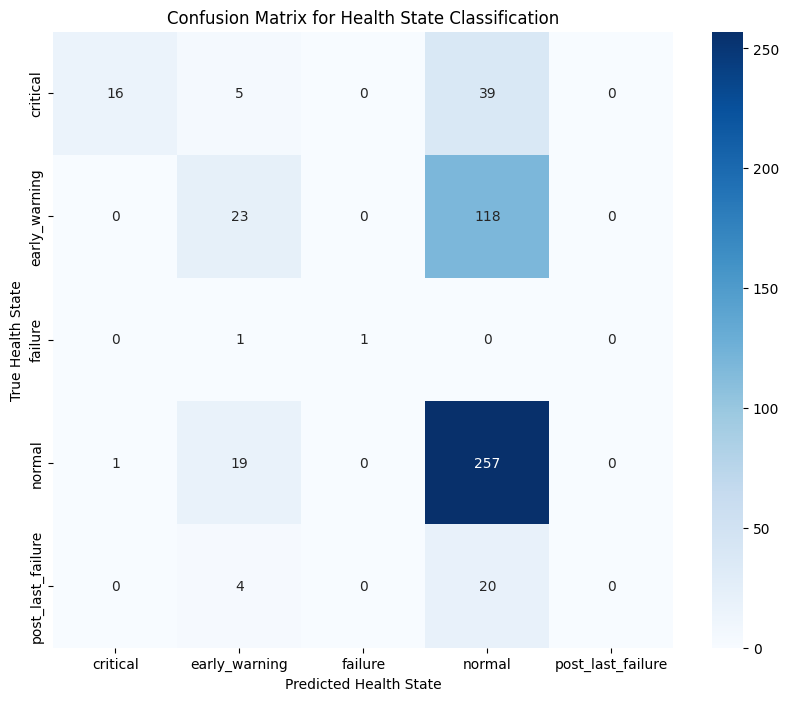

RandomForestClassifier trained, evaluated, and results displayed.


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Instantiate a RandomForestClassifier object
# Set random_state for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)

# 2. Fit the classifier to the training data
print("Training RandomForestClassifier...")
rf_classifier.fit(X_train_clf, y_train_clf)
print("Training complete.")

# 3. Make predictions on the test data
y_pred_clf = rf_classifier.predict(X_test_clf)

# 4. Calculate and print the accuracy score
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"\nAccuracy Score: {accuracy:.4f}")

# 5. Generate and print a classification report
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))

# 6. Generate and display a confusion matrix using a heatmap
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=rf_classifier.classes_,
    yticklabels=rf_classifier.classes_
)
plt.title('Confusion Matrix for Health State Classification')
plt.xlabel('Predicted Health State')
plt.ylabel('True Health State')
plt.show()

print("RandomForestClassifier trained, evaluated, and results displayed.")

---
## **Predicting Health State for RUL**:


In [132]:
import pandas as pd

# 1. Use the rf_classifier to predict the health_state for the entire X_clf DataFrame
# Make sure the indices align if X_clf was derived from new_dataset
predicted_health_state = rf_classifier.predict(X_clf)

# Store these predictions in a new column 'predicted_health_state' in the new_dataset DataFrame
# We'll also use this to add to X later
new_dataset['predicted_health_state'] = predicted_health_state

print("Predicted health states added to new_dataset.")
display(new_dataset.head())

# 2. One-hot encode the predicted_health_state column
predicted_health_state_ohe = pd.get_dummies(new_dataset['predicted_health_state'], prefix='pred_health_state', dtype=int)

# 3. Concatenate these one-hot encoded predicted health states to the existing feature set X
# Ensure proper index alignment
X = pd.concat([X, predicted_health_state_ohe], axis=1)

print("\nML Feature Set (X) after adding one-hot encoded predicted health states:")
display(X.head())

print("\nInfo on ML Feature Set (X) after adding predicted health states:")
X.info()

Predicted health states added to new_dataset.


day_index  vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0          1               2.017                 1.006            100.28   
1          2               2.055                 1.016             98.85   
2          3               2.023                 1.006            101.29   
3          4               2.082                 1.010             99.68   
4          5               2.028                 1.006             99.97   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                     3.512                      59.39                 54.61   
1                     3.517                      60.86                 55.18   
2                     3.513                      60.79                 54.84   
3                     3.473                      60.80                 53.50   
4                     3.504                      59.94                 54.43   

   failure  TTF_days health_state  cluster_label predicted_health_state  
0        0     358.0       normal              0                 normal  
1        0     357.0       normal              0                 normal  
2        0     356.0       normal              0                 normal  
3        0     355.0       normal              0                 normal  
4        0     354.0       normal              0                 normal


ML Feature Set (X) after adding one-hot encoded predicted health states:


vibration_rms_mm_s  suction_pressure_bar  flow_rate_m3_min  \
0           -0.033265              0.491446          0.239793   
1            0.281273              1.193193         -0.404849   
2            0.016399              0.491446          0.695101   
3            0.504760              0.772145         -0.030686   
4            0.057785              0.491446          0.100046   

   bearing_oil_pressure_bar  bearing_oil_temperature_c  casing_temperature_c  \
0                  1.571790                  -1.759315             -0.598335   
1                  1.611358                  -1.004421              0.204981   
2                  1.579703                  -1.040368             -0.274190   
3                  1.263157                  -1.035233             -2.162686   
4                  1.508480                  -1.476872             -0.852013   

   vibration_rms_mm_s_rolling_mean_3  vibration_rms_mm_s_rolling_std_3  \
0                           0.110209                         -0.514339   
1                           0.110209                         -0.514339   
2                           0.110209                         -0.514339   
3                           0.334840                         -0.382841   
4                           0.241532                         -0.336912   

   suction_pressure_bar_rolling_mean_3  suction_pressure_bar_rolling_std_3  \
0                             1.238688                           -0.396149   
1                             1.238688                           -0.396149   
2                             1.238688                           -0.396149   
3                             1.398540                           -0.468736   
4                             0.998911                           -0.735818   

   ...  health_state_critical  health_state_early_warning  \
0  ...                      0                           0   
1  ...                      0                           0   
2  ...                      0                           0   
3  ...                      0                           0   
4  ...                      0                           0   

   health_state_failure  health_state_normal  health_state_post_last_failure  \
0                     0                    1                               0   
1                     0                    1                               0   
2                     0                    1                               0   
3                     0                    1                               0   
4                     0                    1                               0   

   pred_health_state_critical  pred_health_state_early_warning  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   pred_health_state_failure  pred_health_state_normal  \
0                          0                         1   
1                          0                         1   
2                          0                         1   
3                          0                         1   
4                          0                         1   

   pred_health_state_post_last_failure  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 29 columns]


Info on ML Feature Set (X) after adding predicted health states:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   vibration_rms_mm_s                        2516 non-null   float64
 1   suction_pressure_bar                      2516 non-null   float64
 2   flow_rate_m3_min                          2516 non-null   float64
 3   bearing_oil_pressure_bar                  2516 non-null   float64
 4   bearing_oil_temperature_c                 2516 non-null   float64
 5   casing_temperature_c                      2516 non-null   float64
 6   vibration_rms_mm_s_rolling_mean_3         2516 non-null   float64
 7   vibration_rms_mm_s_rolling_std_3          2516 non-null   float64
 8   suction_pressure_bar_rolling_mean_3       2516 non-null   float64
 9   suction_pressure_bar_rolling_std_3       

---
## **Prepare Data for Random Forest Regressor**:

For regression, we need a single continuous target variable (`TTF_days`). We will use the same feature set `X` that was prepared for the Random Survival Forest, but we need to ensure that rows with `NaN` values in `TTF_days` are removed, as regression models cannot handle missing target values directly.

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Define the feature set X_reg and target y_reg
# X is already prepared with all features, including scaled numerical, rolling, clustering, and predicted health states.
X_reg = X.copy()
y_reg = new_dataset['TTF_days'].copy()

# 2. Handle NaN values in the target variable
# Identify indices where y_reg is not NaN
valid_indices = y_reg.dropna().index

# Filter X_reg and y_reg to only include valid_indices
X_reg_filtered = X_reg.loc[valid_indices]
y_reg_filtered = y_reg.loc[valid_indices]

print(f"Original X_reg shape: {X_reg.shape}")
print(f"Original y_reg shape: {y_reg.shape}")
print(f"X_reg_filtered shape after dropping NaNs: {X_reg_filtered.shape}")
print(f"y_reg_filtered shape after dropping NaNs: {y_reg_filtered.shape}")

# 3. Split the filtered data into training and testing sets
# For regression, we typically don't stratify unless there are specific discrete bins we want to ensure representation for.
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_filtered, y_reg_filtered, test_size=0.2, random_state=42
)

print("\nData split into training and testing sets for regression.")
print(f"Shape of X_train_reg: {X_train_reg.shape}")
print(f"Shape of X_test_reg: {X_test_reg.shape}")
print(f"Shape of y_train_reg: {y_train_reg.shape}")
print(f"Shape of y_test_reg: {y_test_reg.shape}")

Original X_reg shape: (2516, 29)
Original y_reg shape: (2516,)
X_reg_filtered shape after dropping NaNs: (2399, 29)
y_reg_filtered shape after dropping NaNs: (2399,)

Data split into training and testing sets for regression.
Shape of X_train_reg: (1919, 29)
Shape of X_test_reg: (480, 29)
Shape of y_train_reg: (1919,)
Shape of y_test_reg: (480,)


---
## **Train Random Forest Regressor**

Now we will train a `RandomForestRegressor` model using the prepared features and `TTF_days` as the target variable.

In [134]:
# 1. Instantiate a RandomForestRegressor object
# Set random_state for reproducibility
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

# 2. Fit the regressor to the training data
print("Training RandomForestRegressor...")
rfr_model.fit(X_train_reg, y_train_reg)
print("RandomForestRegressor training complete.")

# 3. Make predictions on the test data
y_pred_reg = rfr_model.predict(X_test_reg)

# 4. Evaluate the model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Training RandomForestRegressor...
RandomForestRegressor training complete.

Mean Absolute Error (MAE): 80.97
Mean Squared Error (MSE): 14187.79
Root Mean Squared Error (RMSE): 119.11
R-squared (R2): 0.54


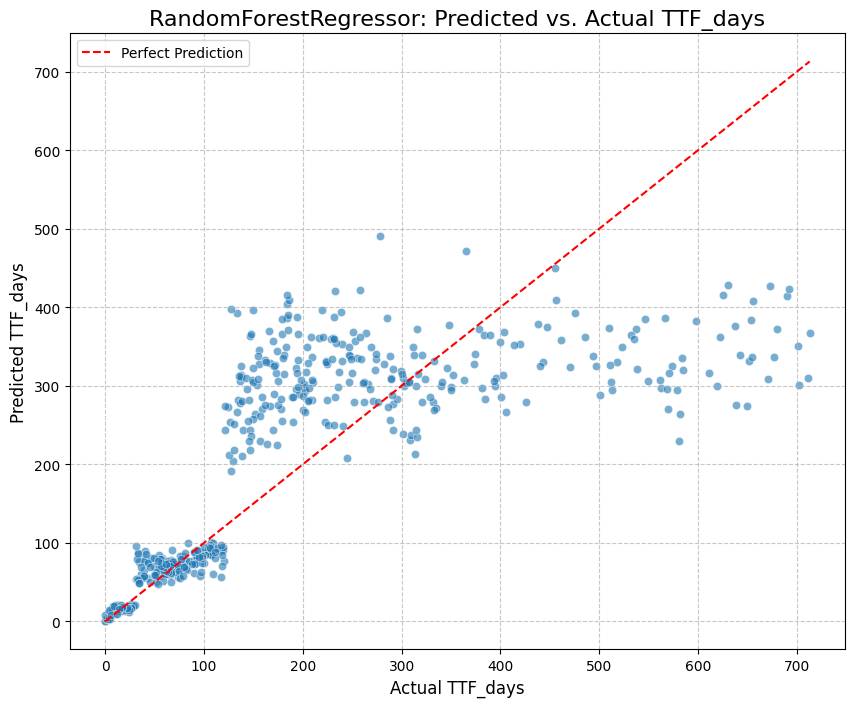

Predicted vs. Actual TTF_days visualization for RandomForestRegressor generated.


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)

# Add a reference line (y=x) for perfect prediction
max_val = max(y_test_reg.max(), y_pred_reg.max())
min_val = min(y_test_reg.min(), y_pred_reg.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.title('RandomForestRegressor: Predicted vs. Actual TTF_days', fontsize=16)
plt.xlabel('Actual TTF_days', fontsize=12)
plt.ylabel('Predicted TTF_days', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("Predicted vs. Actual TTF_days visualization for RandomForestRegressor generated.")

---
## **ML Performance Comments for Predictions <= 120 Days**

In [136]:
# Filter predictions where predicted TTF is 120 or below
mask = y_pred_reg <= 120
predicted_ttf_below_120 = y_pred_reg[mask]
actual_ttf_for_predictions_below_120 = y_test_reg[mask]

print("Predicted TTF_days (<= 120) and Corresponding Actual TTF_days:")
# Create a DataFrame for better readability
results_df = pd.DataFrame({
    'Actual TTF_days': actual_ttf_for_predictions_below_120,
    'Predicted TTF_days': predicted_ttf_below_120
})

display(results_df.head())
print(f"\nTotal {len(results_df)} instances where predicted TTF was 120 days or less.")

Predicted TTF_days (<= 120) and Corresponding Actual TTF_days:


Actual TTF_days  Predicted TTF_days
1510              1.0                2.38
2112             58.0               80.18
1521             18.0               14.99
2157             13.0               21.50
2151             19.0               16.14


Total 195 instances where predicted TTF was 120 days or less.


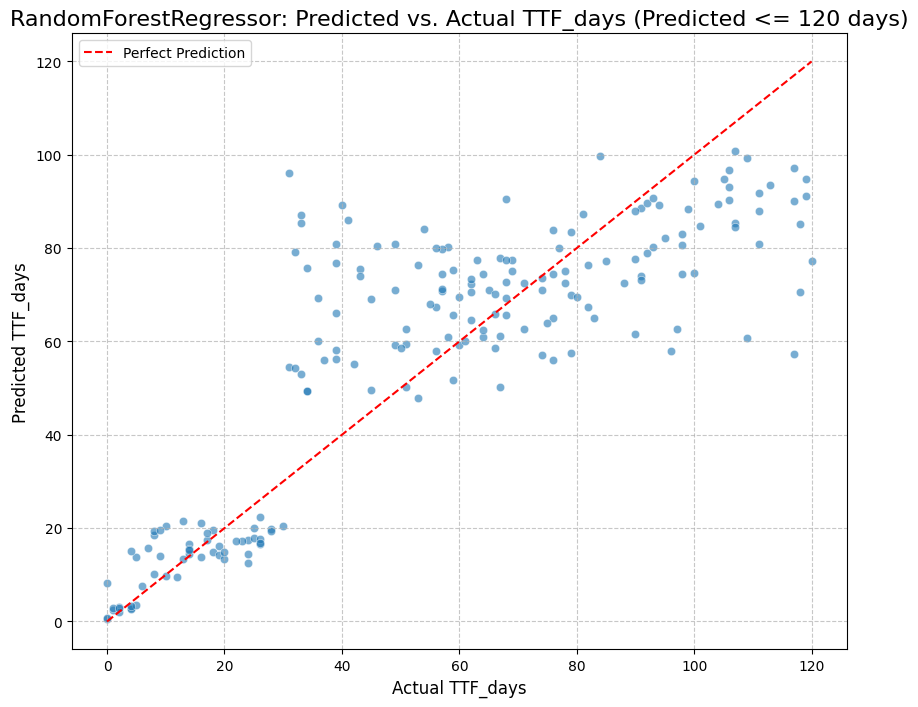

Predicted vs. Actual TTF_days visualization (for predictions <= 120 days) generated.

--- Performance Metrics for Predictions <= 120 Days ---
Mean Absolute Error (MAE): 13.61
Mean Squared Error (MSE): 351.93
Root Mean Squared Error (RMSE): 18.76
R-squared (R2): 0.70


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Visualization for predictions <= 120 days
plt.figure(figsize=(10, 8))
sns.scatterplot(x=actual_ttf_for_predictions_below_120, y=predicted_ttf_below_120, alpha=0.6)

# Add a reference line (y=x) for perfect prediction
max_val_subset = max(actual_ttf_for_predictions_below_120.max(), predicted_ttf_below_120.max())
min_val_subset = min(actual_ttf_for_predictions_below_120.min(), predicted_ttf_below_120.min())
plt.plot([min_val_subset, max_val_subset], [min_val_subset, max_val_subset], color='red', linestyle='--', label='Perfect Prediction')

plt.title('RandomForestRegressor: Predicted vs. Actual TTF_days (Predicted <= 120 days)', fontsize=16)
plt.xlabel('Actual TTF_days', fontsize=12)
plt.ylabel('Predicted TTF_days', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("Predicted vs. Actual TTF_days visualization (for predictions <= 120 days) generated.")

# Calculate and print evaluation metrics for this subset
mae_subset = mean_absolute_error(actual_ttf_for_predictions_below_120, predicted_ttf_below_120)
mse_subset = mean_squared_error(actual_ttf_for_predictions_below_120, predicted_ttf_below_120)
rmse_subset = np.sqrt(mse_subset)
r2_subset = r2_score(actual_ttf_for_predictions_below_120, predicted_ttf_below_120)

print(f"\n--- Performance Metrics for Predictions <= 120 Days ---")
print(f"Mean Absolute Error (MAE): {mae_subset:.2f}")
print(f"Mean Squared Error (MSE): {mse_subset:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_subset:.2f}")
print(f"R-squared (R2): {r2_subset:.2f}")


## **ML Performance Comments for Predictions RUL<= 120 Days**


The scatter plot for this subset shows a tighter clustering of points around the 'Perfect Prediction' line compared to the overall plot, indicating better performance when predicting shorter RULs. This is a critical observation, as accurate short-term predictions are often more valuable for timely maintenance.

Here are the performance metrics for this specific subset:

- **Mean Absolute Error (MAE)**: 13.61
- **Mean Squared Error (MSE)**: 351.93
- **Root Mean Squared Error (RMSE)**: 18.76
- **R-squared (R2)**: 0.70

**ML Performance Comments for Predictions <= 120 Days**:

The MAE of 13.61 means that, on average, the model's predictions for RULs of 120 days or less are off by about 13.61 days. The R-squared value of 0.70 indicates that 70% of the variance in actual `TTF_days`  for this subset can be explained by the model's predictions. This is a good improvement over the overall R2 of 0.54, suggesting that the model is more reliable when predicting nearer-term failures, which is often the most actionable insight for predictive maintenance.

In predictive maintenance, the closer a machine gets to failure, the more pronounced and consistent the deviations in its sensor readings typically become. These deviations often follow specific patterns that indicate degradation. For example, `vibration_rms_mm_s might` show a sharp increase, `bearing_oil_pressure_bar` might drop significantly, and `bearing_oil_temperature_c` might spike.

This model, especially with the rolling features and predicted `health_state` (which itself is derived from sensor patterns), is likely picking up on these distinct, accelerating trends and anomalies that become clearer and more predictable as failure approaches. When the machine is far from failure, sensor readings might fluctuate more randomly, or degradation might be too subtle to discern a clear pattern, leading to lower accuracy. However, in the 'final stretch' (e.g., the last 120 days), these degradation signals strengthen, allowing the model to make much more precise predictions.